In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']=400
df = pd.read_csv('data/WPP2019.csv', index_col='Time', parse_dates=True)
#df2 = pd.read_csv('https://raw.githubusercontent.com/datasets/population/master/data/population.csv')

In [2]:
worldpop = pd.DataFrame(df.groupby('Time')['PopTotal'].sum())

In [3]:
worldpop = worldpop[:'2018']

In [4]:
worldpop_growth = worldpop.diff()

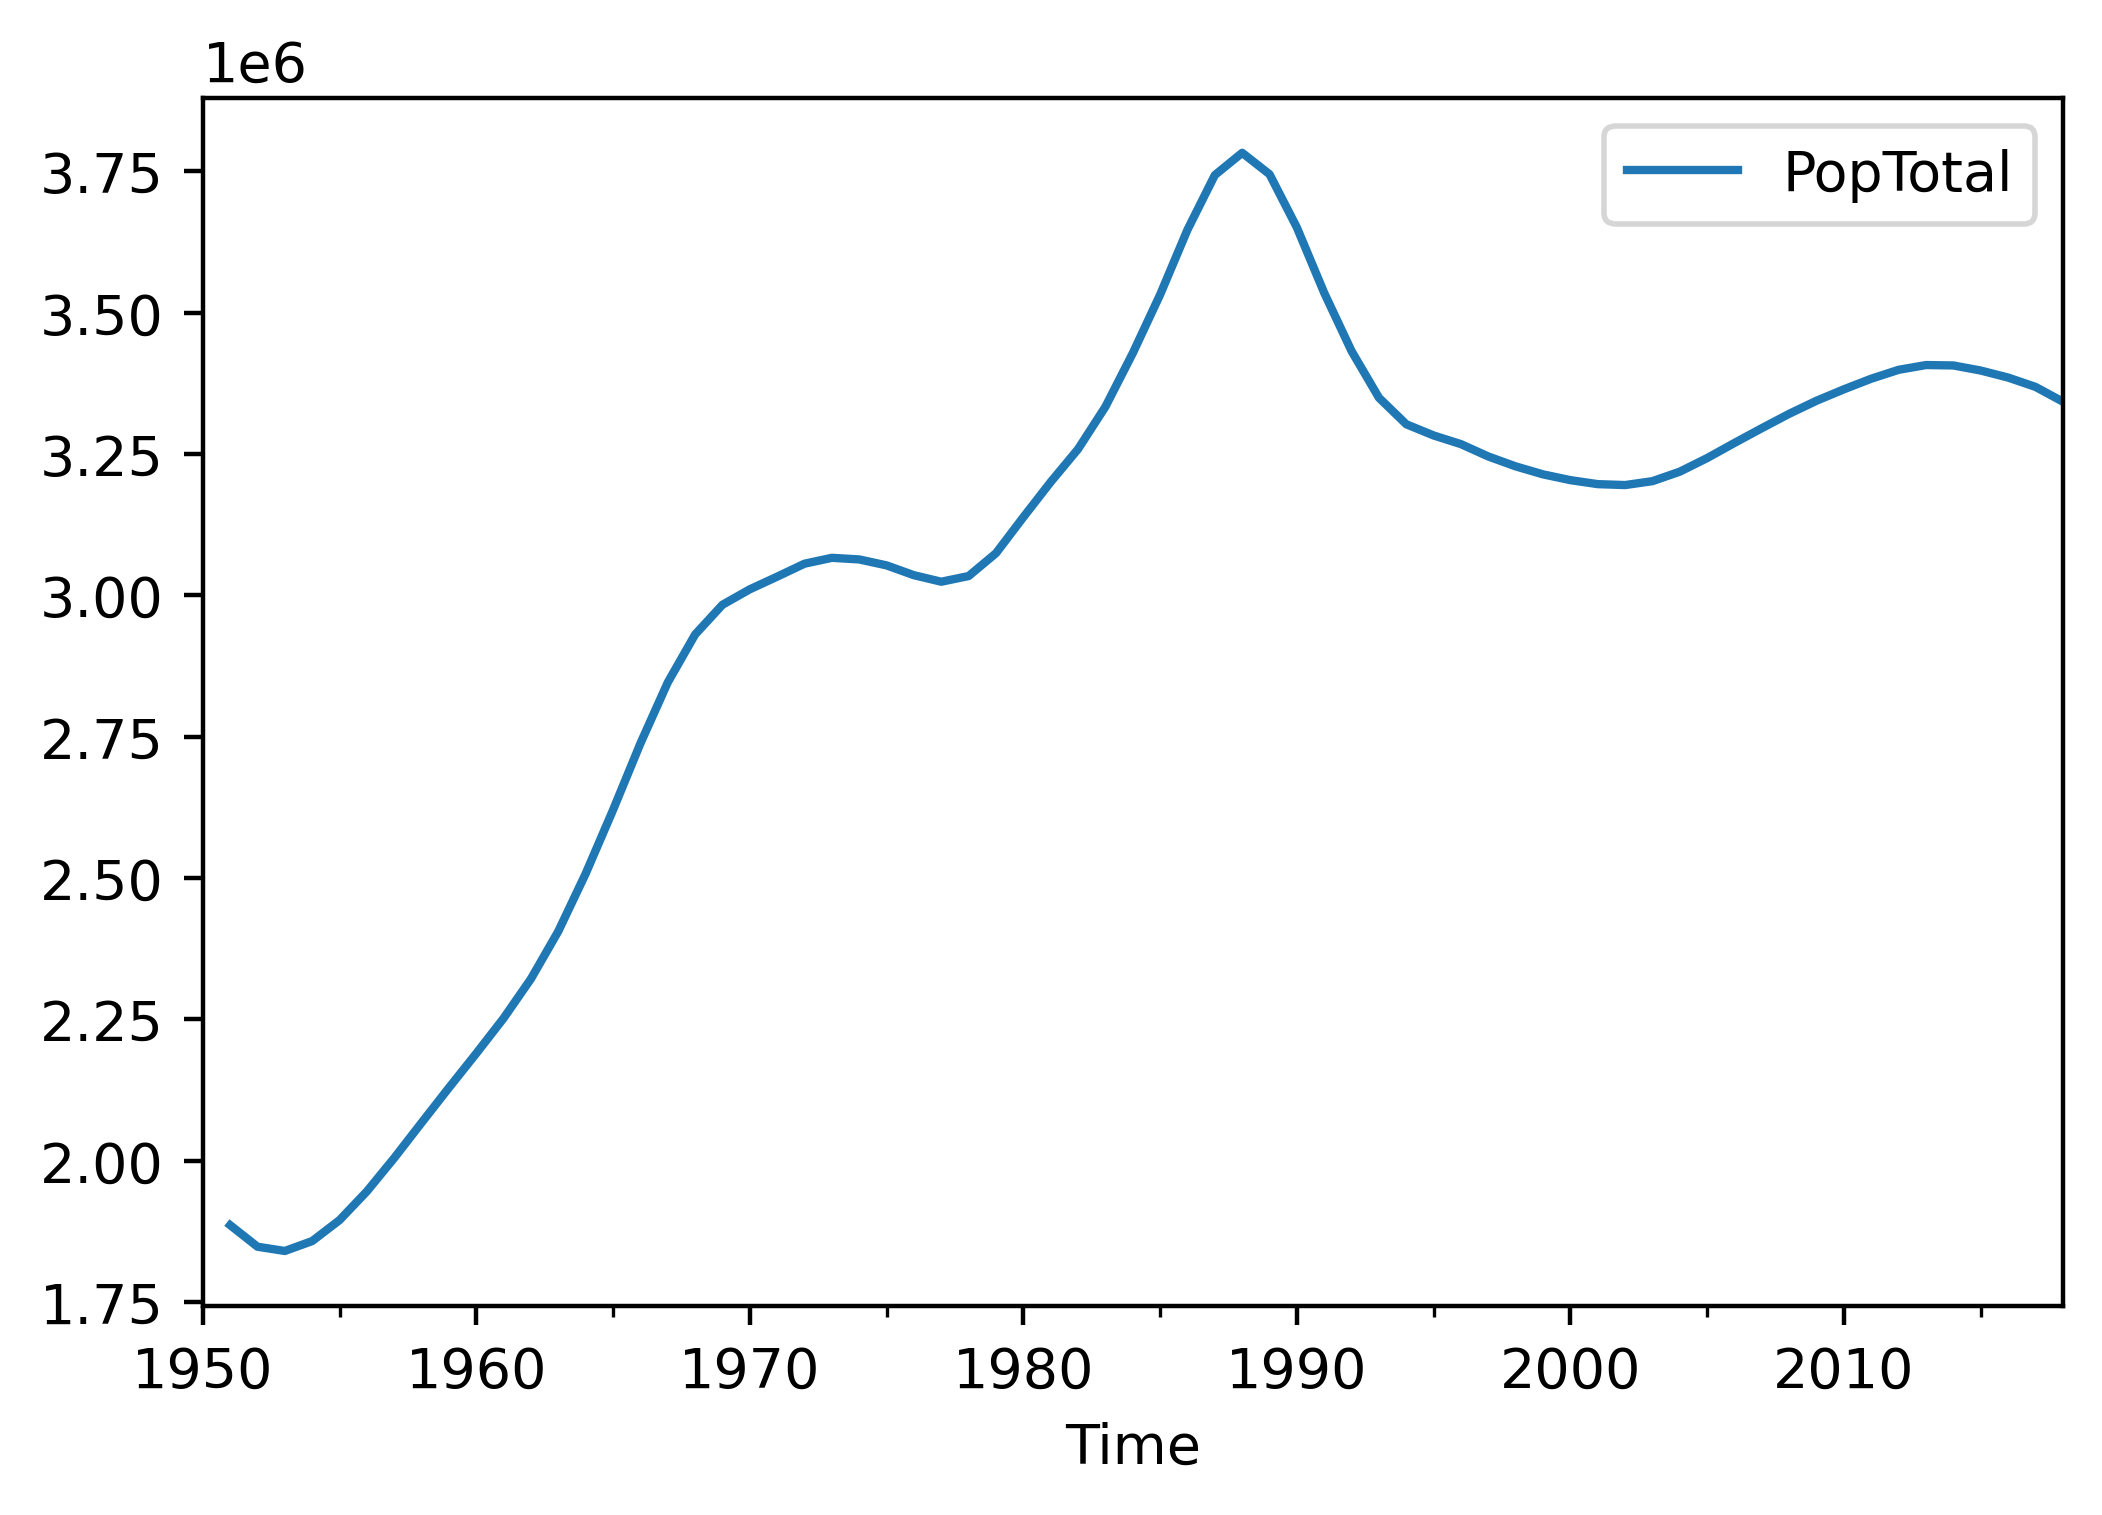

In [5]:
worldpop_growth.plot()

In [6]:
worldpop_GD = worldpop_growth.diff()

In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(worldpop_GD, order=(1,0,1), trend='c')
res = model.fit()

C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [8]:
dynamic_forecast = res.get_prediction(start=-5, dynamic=True)
mean_forecast = dynamic_forecast.predicted_mean
confidence_intervals = dynamic_forecast.conf_int()
lower_limits = confidence_intervals.loc[:,'lower PopTotal']
upper_limits = confidence_intervals.loc[:,'upper PopTotal']

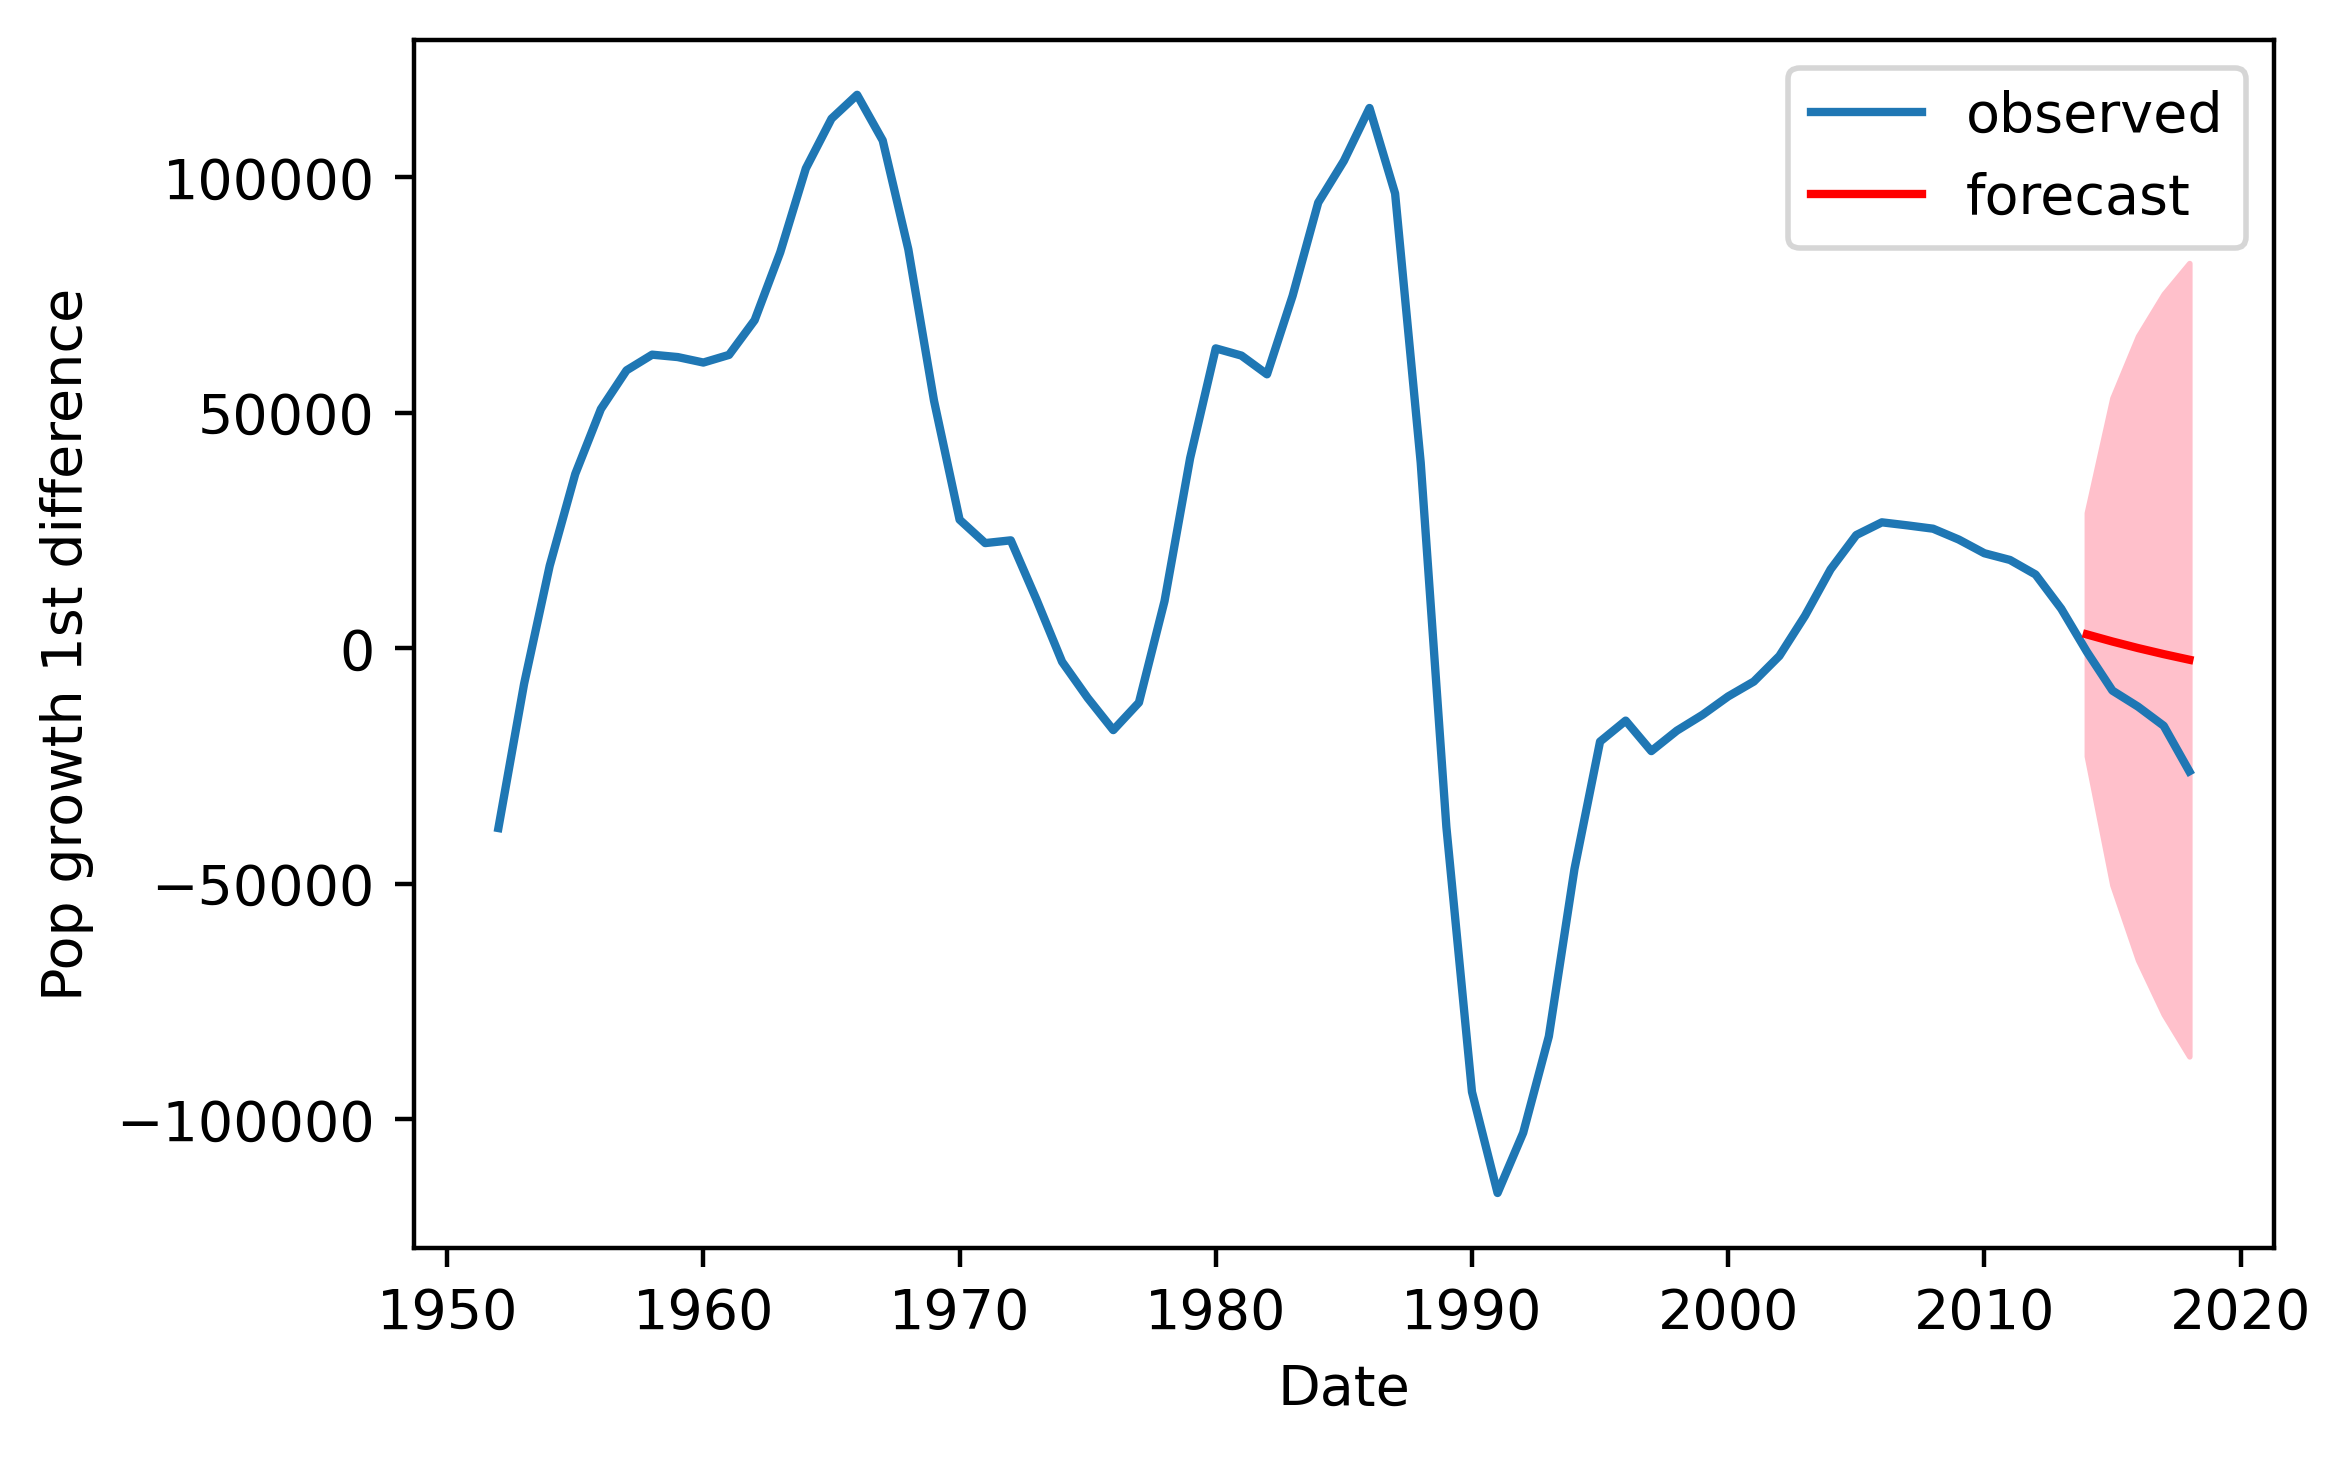

In [9]:
plt.plot(worldpop_GD.index, worldpop_GD, label='observed')
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

plt.xlabel('Date')
plt.ylabel('Pop growth 1st difference')
plt.legend()
plt.show()

In [11]:
# pd.DataFrame(confidence_intervals)[0]

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(worldpop_growth, order=(2,1,1))
res = model.fit()
#dynamic_forecast = res.get_prediction(start=-5, dynamic=True)
mean_forecast = res.get_forecast(steps=5).predicted_mean
confidence_intervals = res.conf_int()
# lower_limits = confidence_intervals.loc[:,'lower PopTotal']
# upper_limits = confidence_intervals.loc[:,'upper PopTotal']

C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


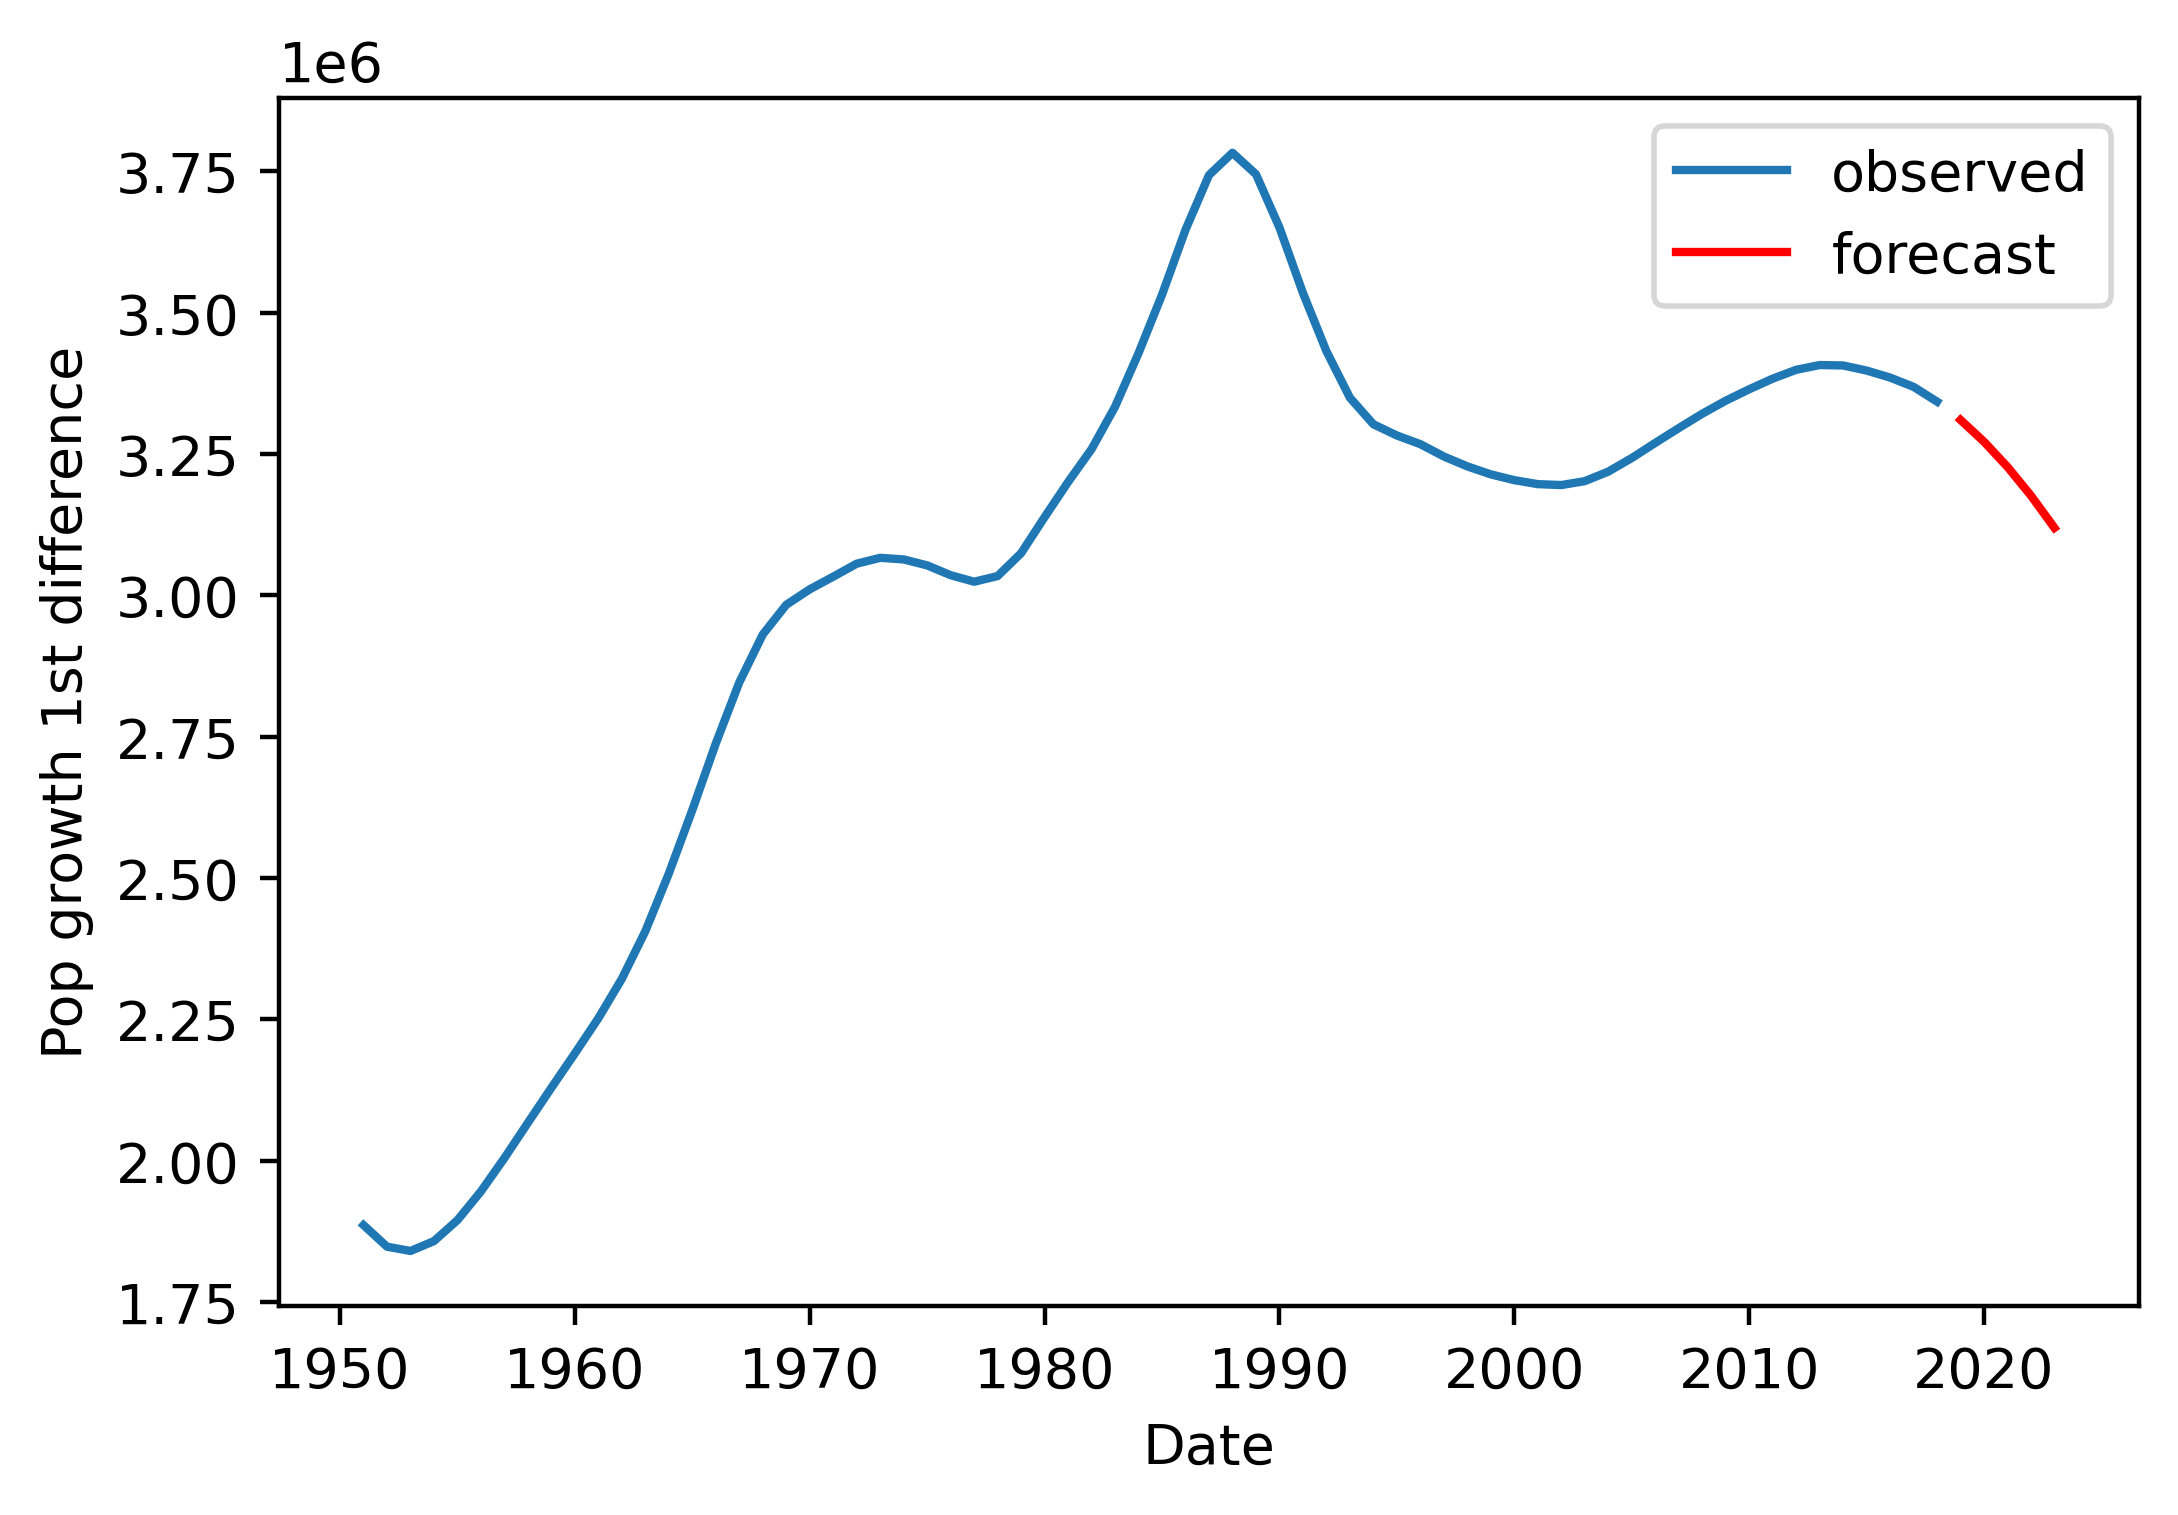

In [13]:
plt.plot(worldpop_growth.index, worldpop_growth, label='observed')
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')
#plt.fill_between(lower_limits.index, lower_limits, 
               #upper_limits, color='pink')

plt.xlabel('Date')
plt.ylabel('Pop growth 1st difference')
plt.legend()
plt.show()

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(worldpop, order=(2,2,1))
res = model.fit()
#dynamic_forecast = res.get_prediction(start=-5, dynamic=True)
mean_forecast = res.get_forecast(steps=10).predicted_mean
confidence_intervals = res.conf_int()
# lower_limits = confidence_intervals.loc[:,'lower PopTotal']
# upper_limits = confidence_intervals.loc[:,'upper PopTotal']

C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


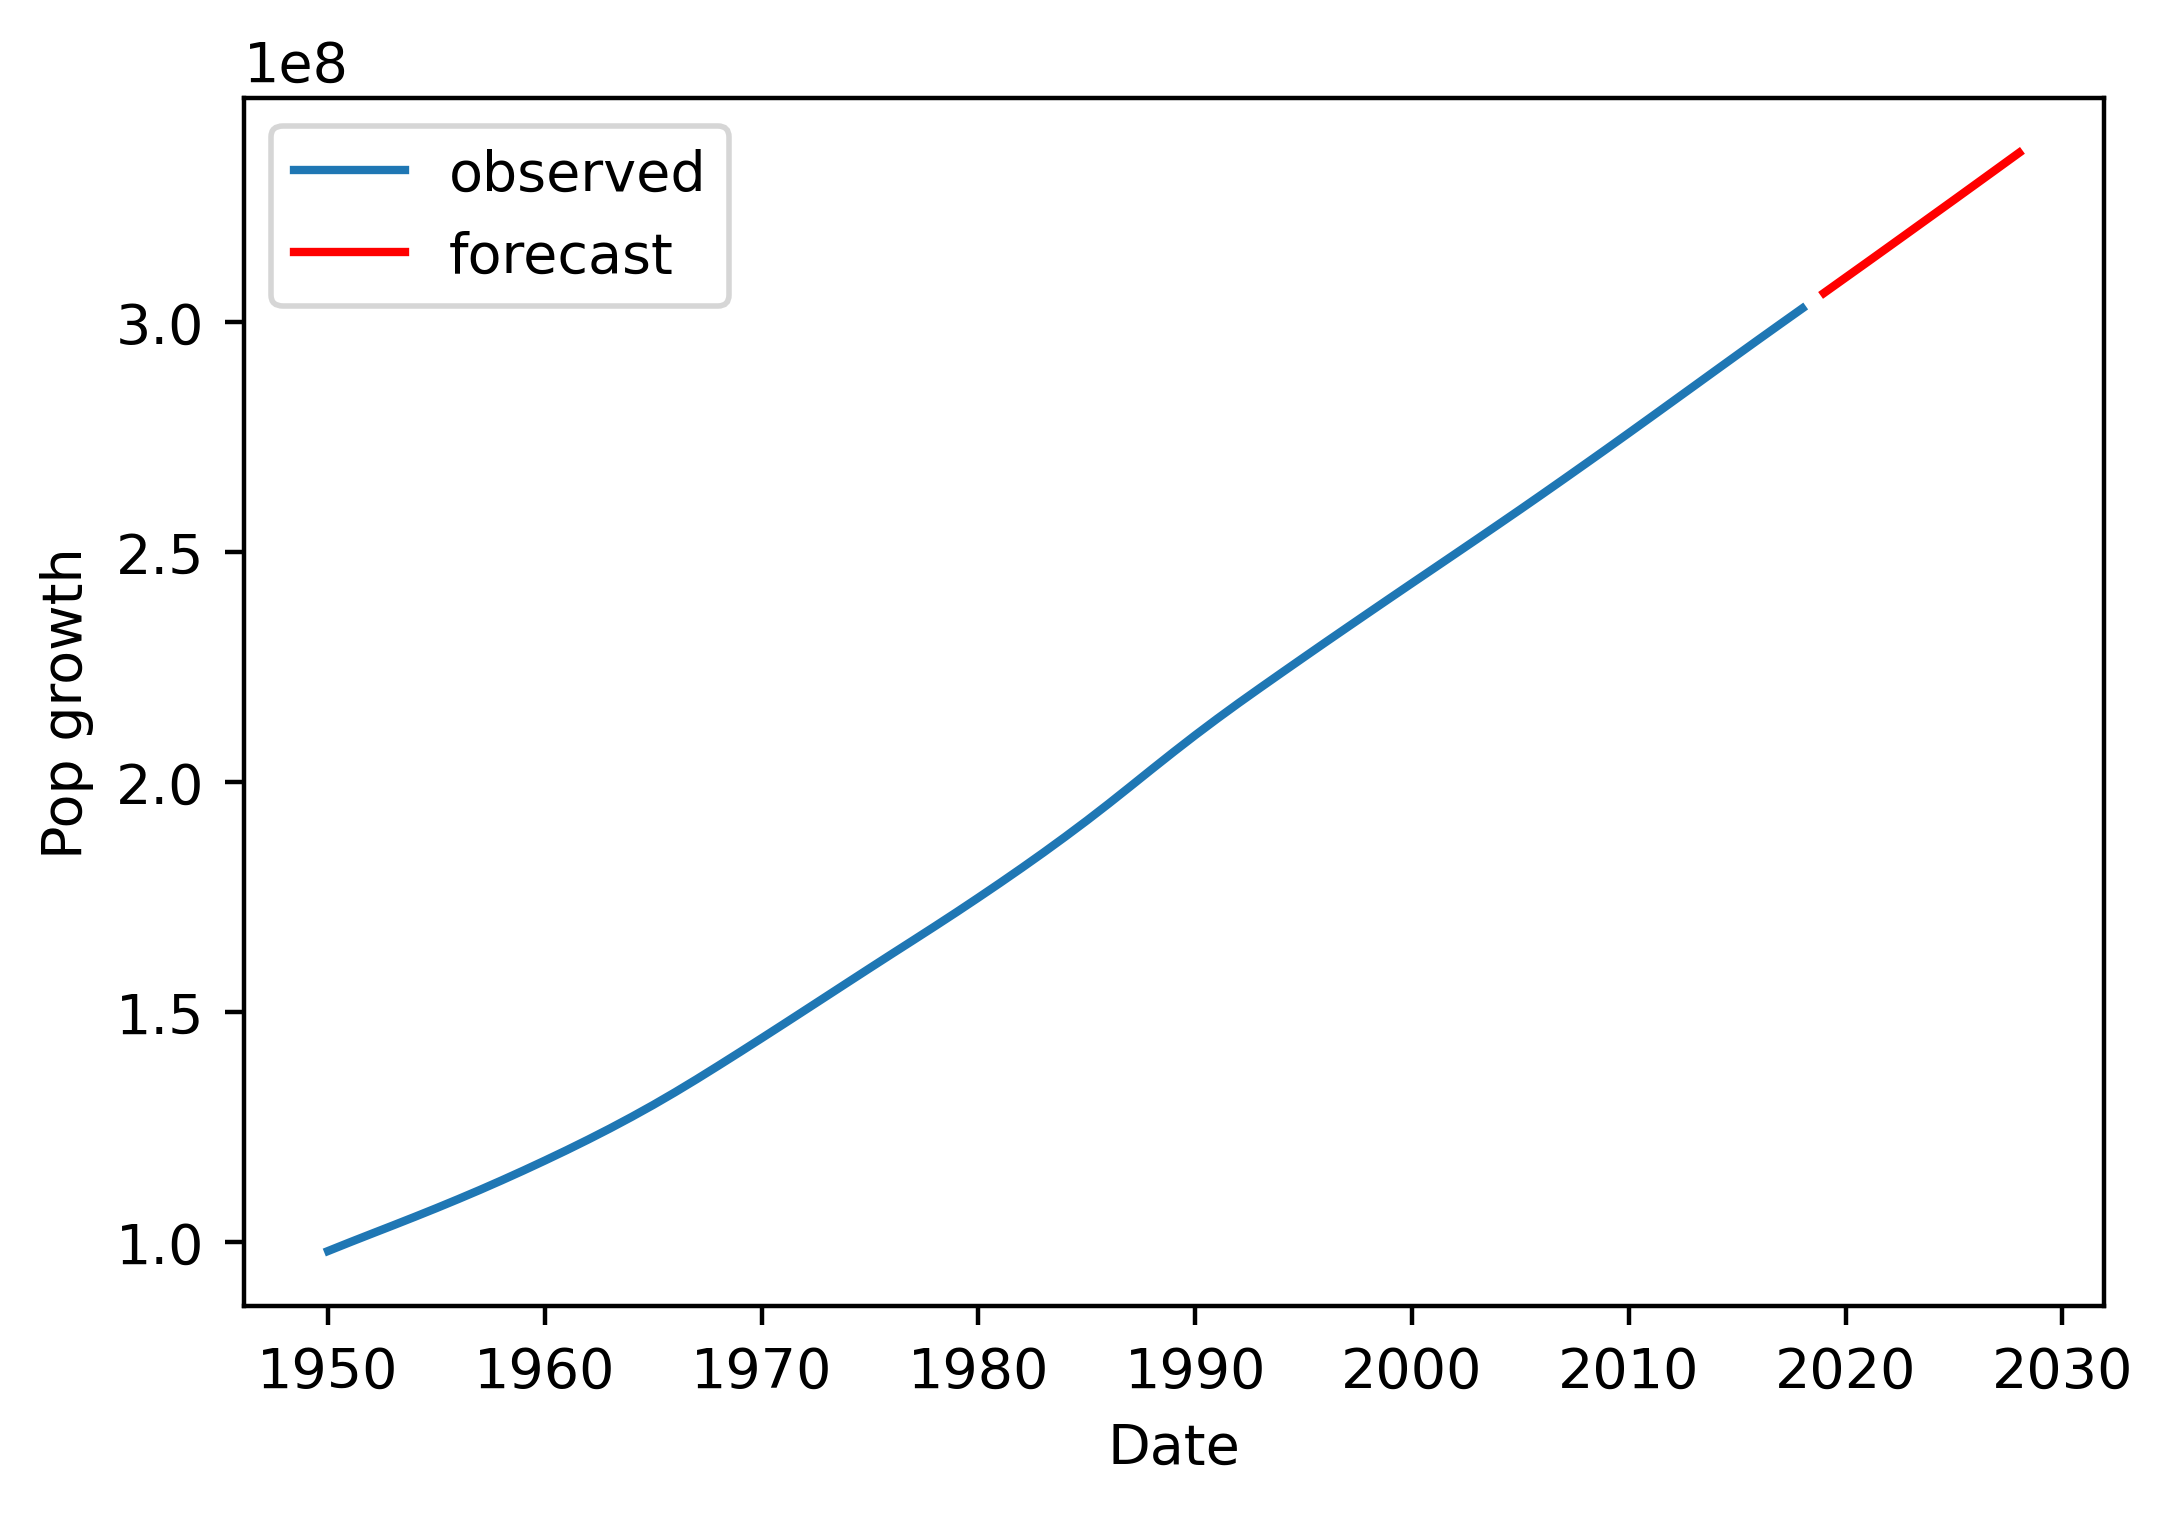

In [15]:
plt.plot(worldpop.index, worldpop, label='observed')
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')
#plt.fill_between(lower_limits.index, lower_limits, 
               #upper_limits, color='pink')

plt.xlabel('Date')
plt.ylabel('Pop growth')
plt.legend()
plt.show()

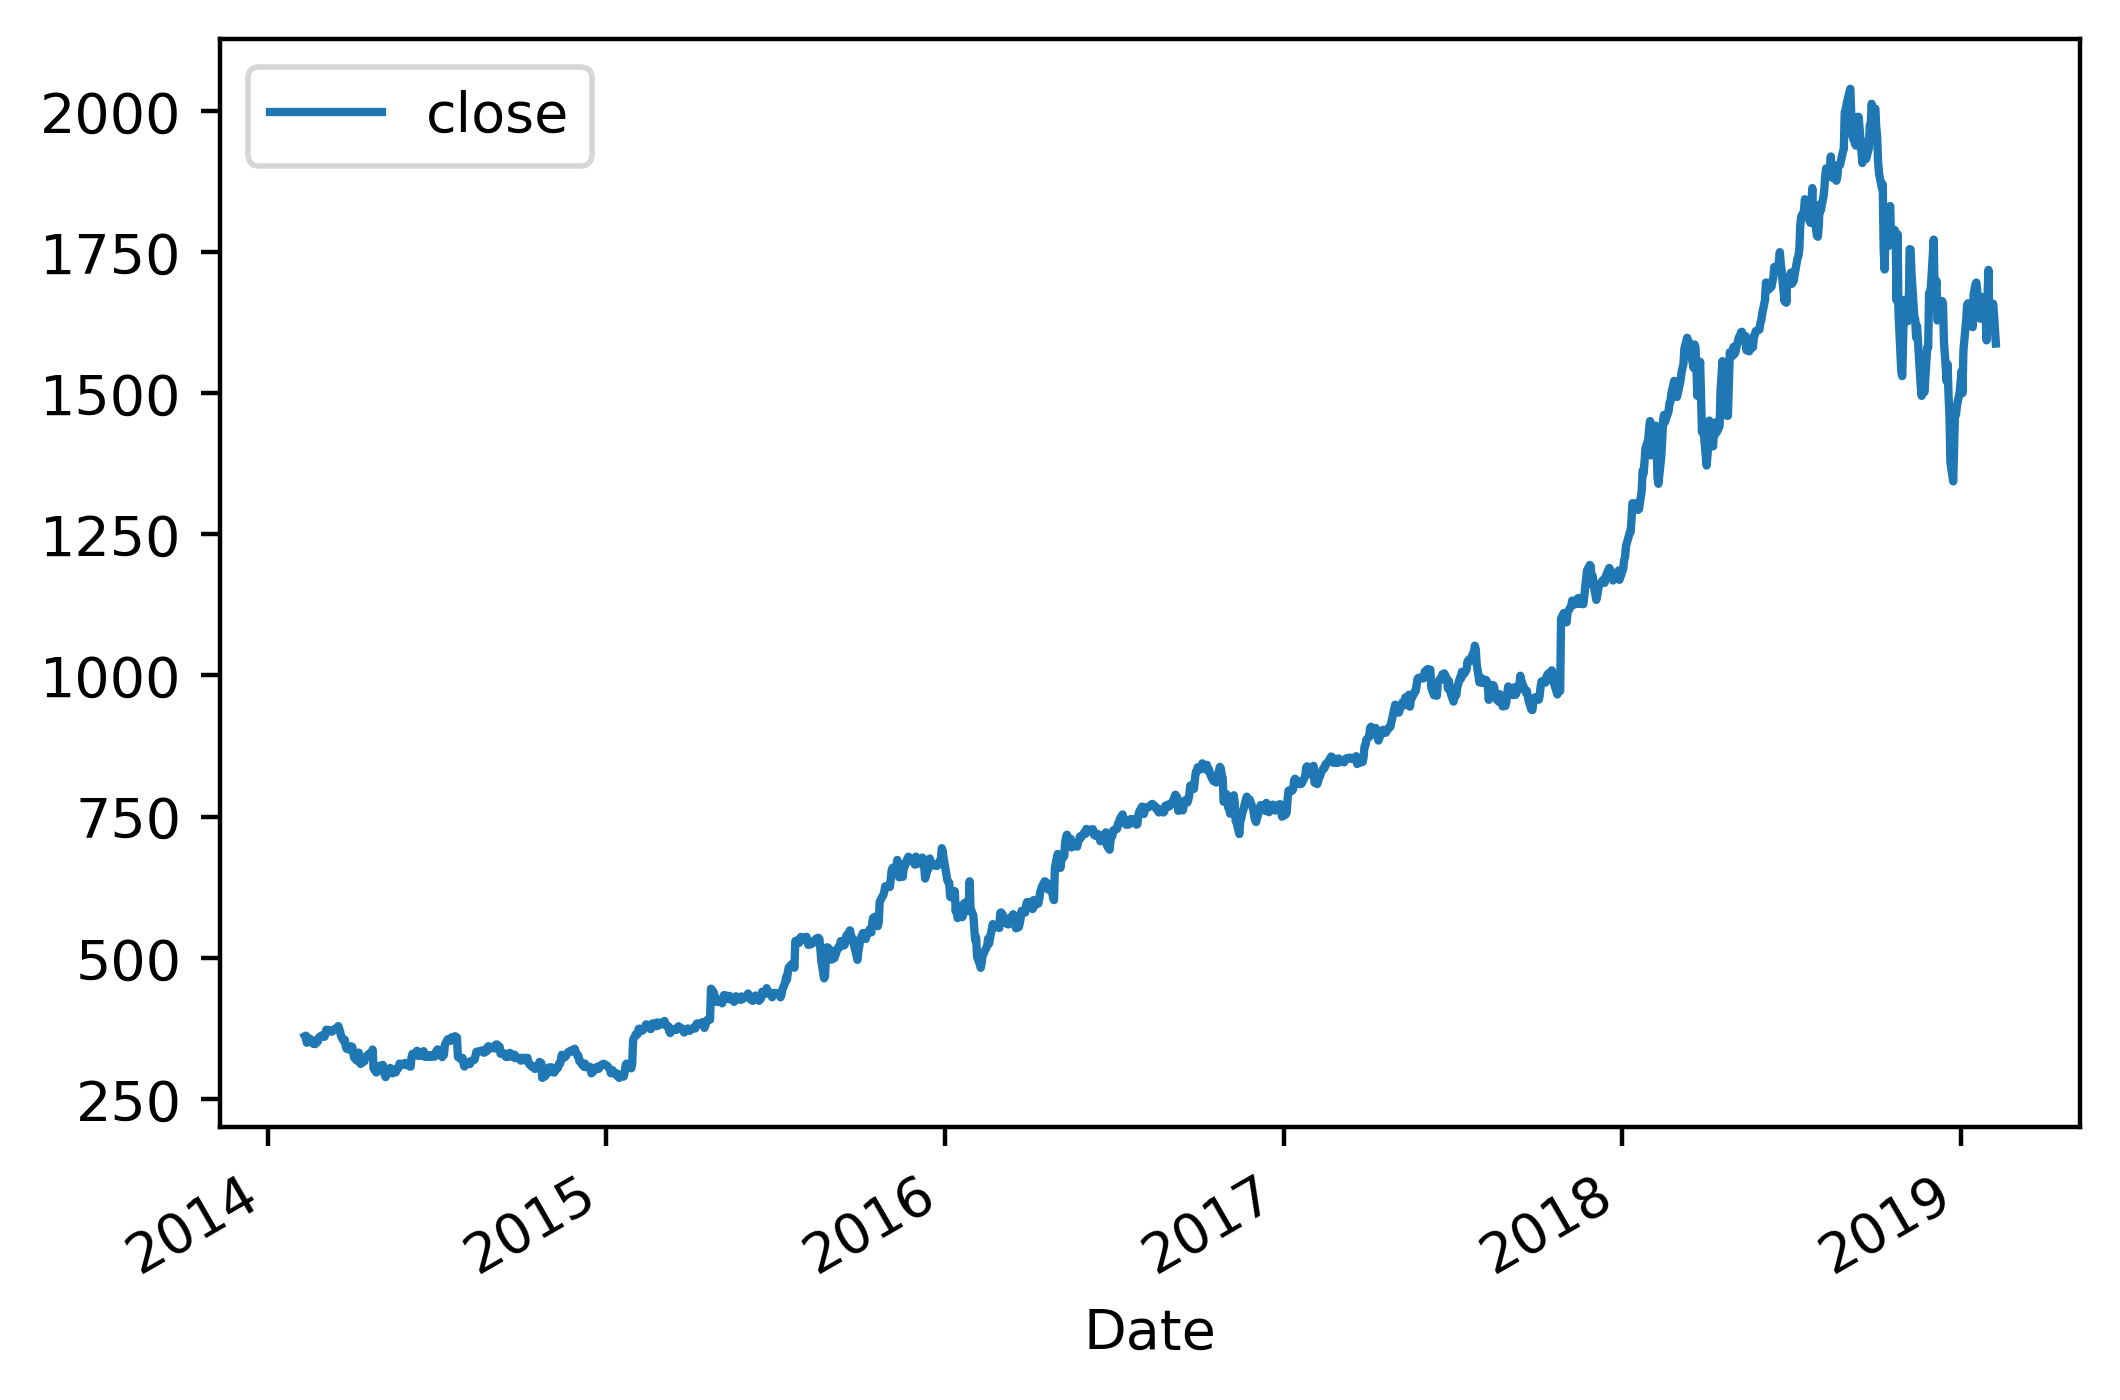

In [16]:
amazon = pd.read_csv('data/AMZN.csv', index_col='Date', parse_dates=True)
amazon = amazon[['Adj Close']]
amazon = amazon['2014-02-10':'2019-02-08']
amazon.columns = ['close']
amazon.plot();

In [17]:
amazon_diff = amazon.diff().dropna()

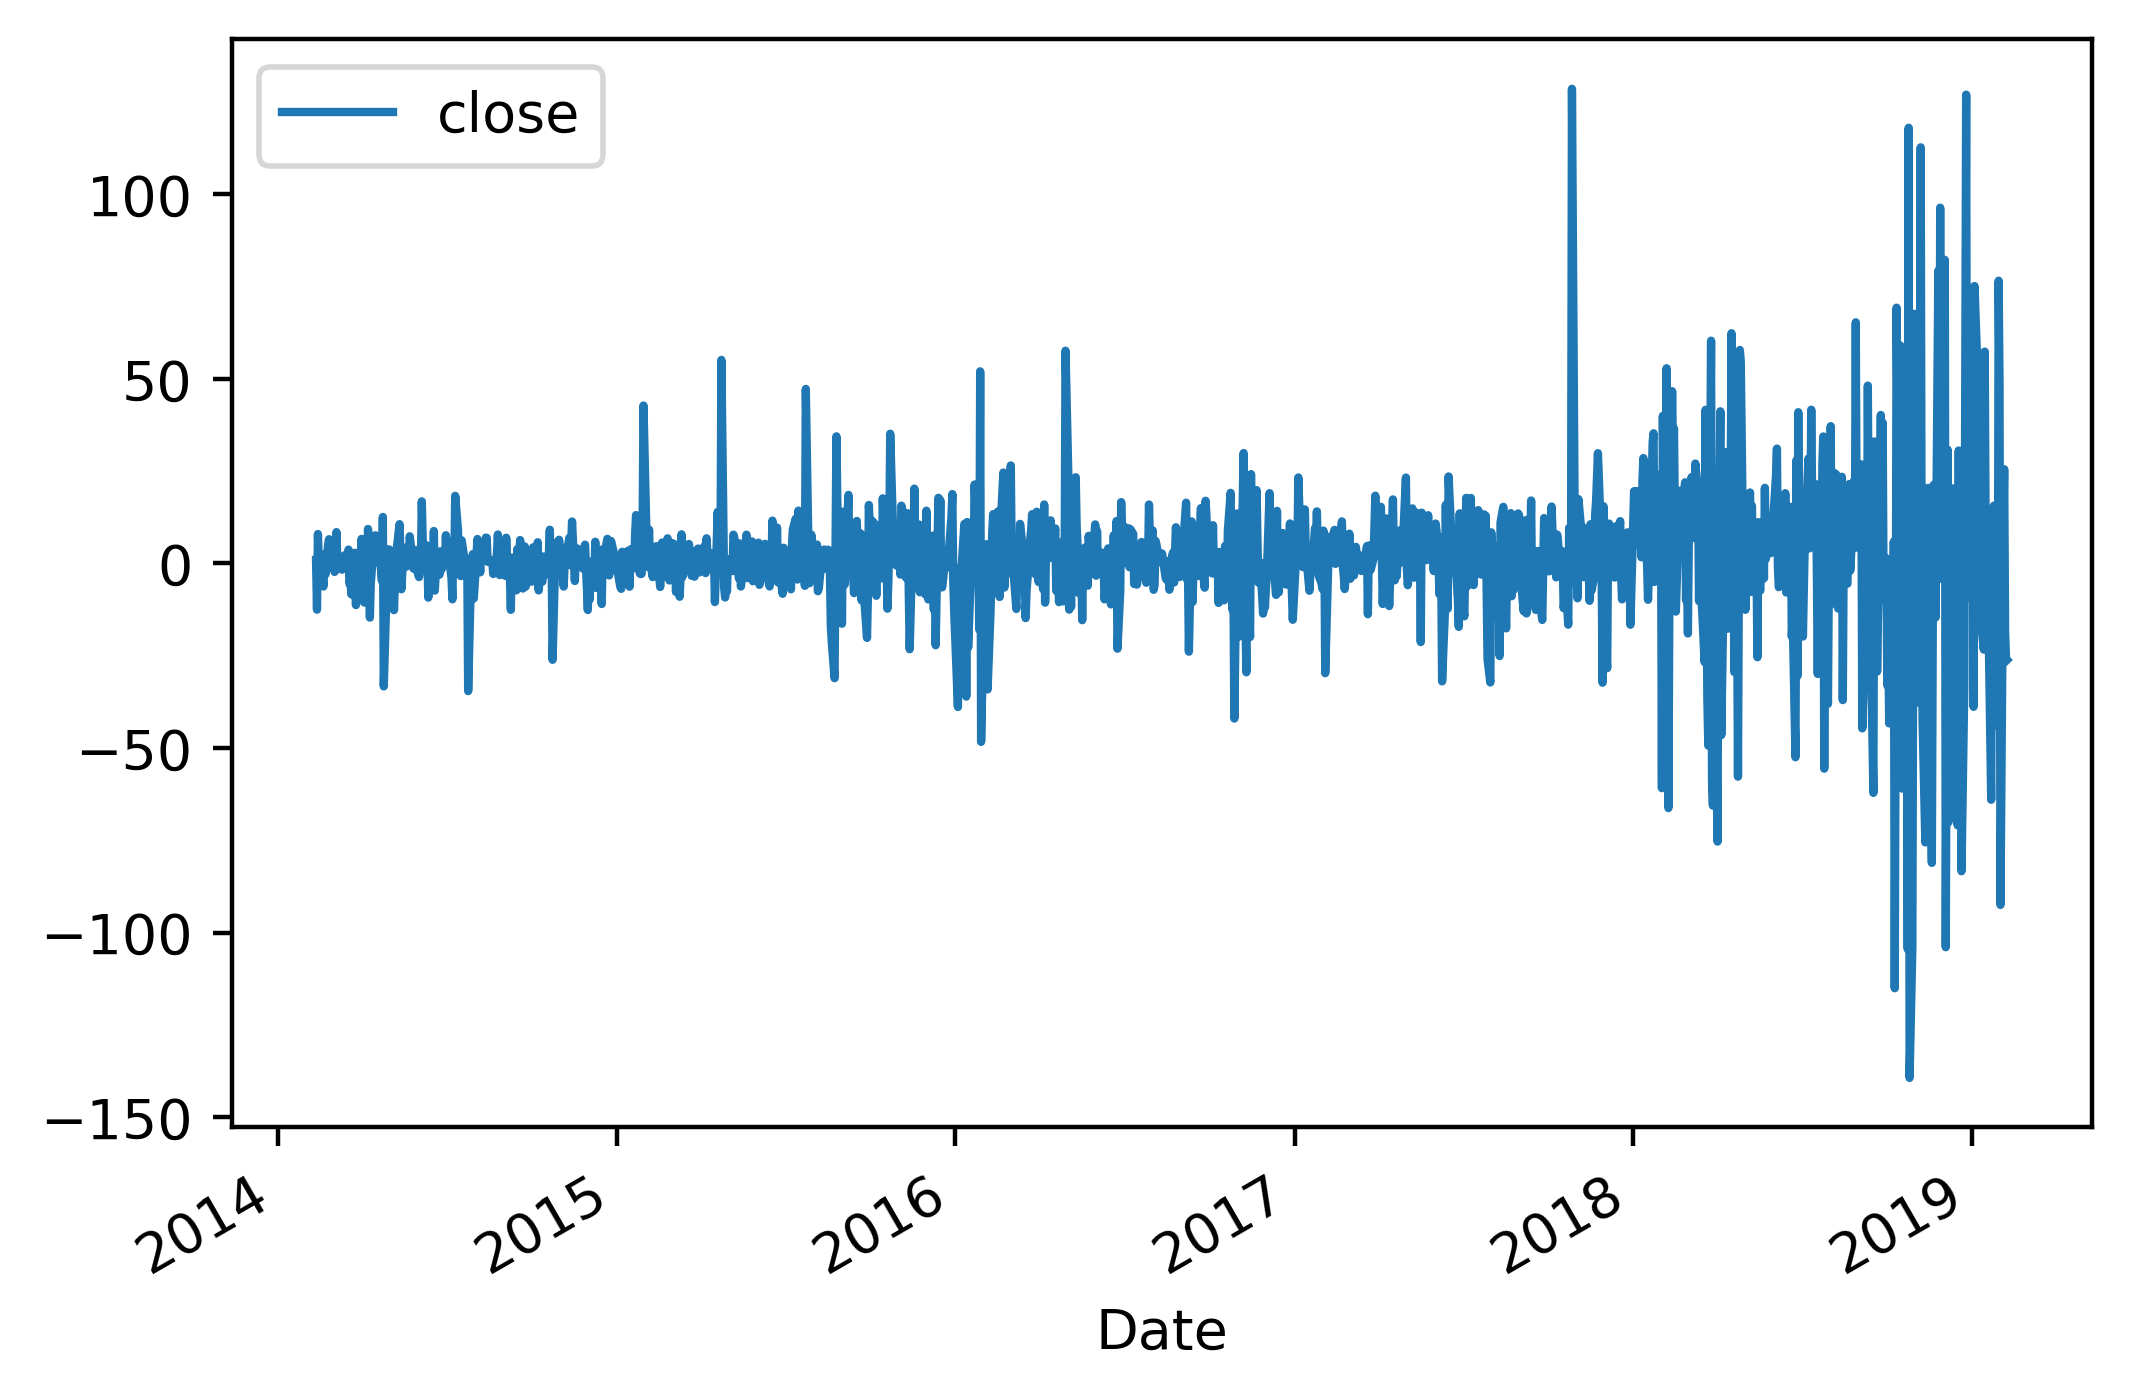

In [18]:
amazon_diff.plot()

In [19]:
arma = SARIMAX(amazon_diff, order=(2,0,2))
arma_results = arma.fit()
print(arma_results.summary())

C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1258
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -5531.081
Date:                Thu, 15 Oct 2020   AIC                          11072.161
Time:                        09:34:51   BIC                          11097.848
Sample:                             0   HQIC                         11081.815
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0772      0.004    268.988      0.000       1.069       1.085
ar.L2         -0.9953      0.003   -285.682      0.000      -1.002      -0.988
ma.L1         -1.0916      0.006   -182.445      0.0

In [20]:
arma_diff_forecast = arma_results.get_forecast(steps=10).predicted_mean
arma_int_forecast = np.cumsum(arma_diff_forecast)
arma_value_forecast = arma_int_forecast + amazon.iloc[-1,0]
print(arma_value_forecast)

1258    1593.549113
1259    1601.869485
1260    1605.528298
1261    1601.188269
1262    1592.871329
1263    1588.231727
1264    1591.511797
1265    1599.663109
1266    1605.179290
1267    1603.008357
Name: predicted_mean, dtype: float64


C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [21]:
arima = SARIMAX(amazon, order=(2,1,2))
arima_results = arima.fit()
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean
print(arima_value_forecast)

C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


1259    1594.065222
1260    1602.330327
1261    1605.417674
1262    1600.527387
1263    1592.195854
1264    1588.088034
1265    1591.945970
1266    1600.180431
1267    1605.209649
1268    1602.439899
Name: predicted_mean, dtype: float64


C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [22]:
date = pd.date_range(start ='2013-01-01',  
         end ='2015-09-27', freq ='1D') 
y = [ 1.62434536e+00, -9.36625486e-01,  8.14831396e-02, -6.63557587e-01,
        7.38022904e-01, -2.95496234e+00,  2.14285121e+00, -1.54100857e+00,
        3.04262396e-01, -1.80967357e-02,  1.37933167e+00, -2.33166168e+00,
        4.53432206e-01, -4.98980746e-01,  4.95812939e-01, -1.53858662e+00,
        2.72464572e-01, -8.33209324e-01, -1.63910412e-01,  2.59286477e-01,
       -1.46787562e+00,  1.55235623e+00,  5.17304790e-01,  3.35407555e-01,
        1.41425141e+00, -4.42673531e-01,  4.34860433e-01, -8.46052962e-01,
       -3.22719618e-01,  2.66335185e-01, -1.15882910e+00, -1.79681160e-01,
       -6.56213580e-01, -1.03429539e+00, -8.27382871e-01, -3.38128875e-01,
       -1.56971296e+00,  2.52704549e-01,  1.27392655e+00,  1.45215330e-01,
        2.28020978e-01, -1.28707952e-01, -4.04569918e-01,  1.51804690e+00,
       -7.78119343e-01, -3.63568305e-01,  8.41293321e-01,  1.88621567e+00,
       -4.33716123e-01,  1.28052251e+00,  8.42853925e-01, -1.91075292e-01,
       -7.96856200e-01, -1.36462941e-01, -5.87456102e-01,  1.80843762e-01,
        5.54187689e-01,  8.76624086e-01,  5.27048891e-01,  1.35904935e+00,
       -5.66419352e-01,  1.75496629e+00,  3.01579156e-01, -2.51137735e-01,
        1.07787611e+00, -1.08824247e-01,  1.20387132e+00,  1.41737487e+00,
        2.19842935e+00, -1.03817756e+00, -5.31968714e-02,  2.10806195e-02,
       -5.91252800e-01,  2.59587607e-01,  3.70725250e-02, -1.77446641e+00,
        4.55777391e-01,  3.77245565e-01, -6.34021762e-01,  8.72523422e-01,
       -5.73095653e-02,  1.41339334e-01,  3.88617916e-01,  2.45813506e-01,
        1.12030387e-01,  2.58332613e-01, -5.11958605e-01,  6.06888753e-01,
       -1.19187578e-01,  1.01719010e+00,  1.12283662e+00,  3.20764395e-01,
        2.86204303e-01, -1.48451128e-01,  4.94201876e-01, -3.11563410e-01,
       -4.23892505e-01,  2.62617919e-01, -7.08674297e-01,  7.31955157e-01,
       -7.59656168e-01,  1.33734277e+00,  2.33861142e-01,  7.46093937e-01,
       -7.25227746e-01,  6.87485852e-01,  5.56279968e-01, -1.37947072e+00,
        1.97503280e-01,  2.19150027e-02, -1.74561596e+00,  5.19701668e-01,
        3.80977937e-01, -1.34613545e+00,  8.70845179e-01, -1.38639919e+00,
        7.10701843e-02, -1.89655448e+00,  1.03927850e+00, -3.11723363e-01,
       -2.54703457e-01, -3.11142754e-01,  1.54407333e+00,  1.47241699e+00,
       -2.10182392e+00,  2.58001771e+00,  1.41315391e+00, -1.74063804e-01,
       -4.07725937e-01,  1.69289766e+00, -6.11966266e-01, -6.68513382e-01,
       -9.04546505e-01,  5.61096844e-01,  1.32505738e-01, -9.85948295e-01,
        1.04828579e+00, -1.19767382e+00,  9.99842992e-01, -3.00934424e-01,
       -2.98627339e-01,  1.90096581e-01,  8.47234589e-01,  4.90139715e-01,
        6.09525082e-01,  5.17597484e-01,  4.34243975e-01,  8.02965997e-01,
        1.73475208e-01,  8.44912912e-01, -1.91364609e-01, -2.09830062e+00,
        1.63752254e+00,  1.15572837e+00, -4.14835435e-01,  7.79313153e-01,
        6.72089530e-01,  1.05975241e-02, -2.97597473e-02, -1.20215029e+00,
       -3.23184146e-01, -1.22499073e+00, -4.35294291e-02, -8.00637370e-01,
        3.30071255e-01, -2.88098022e-01,  1.08084687e+00,  1.12419313e-01,
        2.39148256e+00, -1.97454014e+00,  4.53625585e-01,  1.11917187e+00,
        1.58504505e+00, -6.77928858e-01,  1.12233973e+00,  4.48859238e-01,
        1.31523023e+00, -6.08392861e-01,  1.06907427e+00, -1.42570792e-01,
       -1.09076984e+00,  6.76139944e-01, -3.72328369e-02,  9.04885609e-01,
       -1.24072443e-01, -5.63494496e-02,  1.04106717e+00, -9.01578541e-02,
        2.16137369e-01,  1.11803737e-01,  1.33138176e+00,  1.99690714e-01,
        2.15692792e+00,  1.18907434e+00,  1.11908388e+00, -8.54533678e-01,
        1.45883890e+00,  9.30178423e-03,  4.19359514e-01,  1.18903221e+00,
       -2.40396448e-01,  1.46079939e+00, -5.34037384e-01,  2.19427739e+00,
       -1.64441723e+00, -1.07652643e+00, -1.11170563e+00, -1.48820340e+00,
       -1.96442723e+00,  1.41751893e+00, -1.32061657e+00, -1.02628684e+00,
        1.87179196e+00, -1.31015312e+00, -1.18803643e+00,  1.28156731e+00,
       -9.88188036e-02, -6.67933453e-01,  1.94429167e+00, -9.58847723e-02,
        1.88290428e+00,  6.40343436e-01,  1.98207272e+00,  4.33548733e-01,
       -6.23161009e-01,  3.19378000e+00, -1.36875041e+00,  2.79204246e-01,
       -8.95525880e-02, -2.86698357e-01,  1.35774205e-02, -1.17841596e-01,
        6.32436749e-01,  1.79330404e+00, -2.20041074e-01, -4.73074272e-01,
       -4.34185888e-01, -8.35366485e-01, -2.26567656e+00,  6.05447193e-01,
       -1.36520463e+00, -4.66092061e-01,  1.58350391e-01, -1.63900169e+00,
       -6.75855214e-01,  4.27421226e-01, -1.93784210e-01, -6.22861207e-01,
        2.28714450e+00, -1.61522375e+00,  3.26367069e-01, -1.03999036e-02,
       -3.24213129e+00,  2.32339773e+00, -9.28351171e-01, -1.37452264e+00,
        2.95124957e+00, -2.80498986e-02,  6.14368958e-01,  9.81470067e-02,
        5.32178846e-01, -1.60016654e+00,  9.49929455e-01, -9.59280815e-01,
       -1.02604062e-02,  1.30142156e+00, -2.77798983e-02,  6.06348741e-01,
        6.70046708e-01, -6.24406798e-01,  1.14434907e+00,  1.23912648e+00,
        4.80953773e-01,  1.44695683e+00, -3.63613851e-01, -1.99216577e-01,
       -1.26503039e+00,  9.96907653e-01, -1.19322946e+00,  1.38809303e+00,
       -7.68458510e-01,  6.25725762e-02,  3.68306562e-01,  5.36538852e-01,
       -2.26164987e-01,  5.04037263e-01,  2.68962696e-01,  2.55444692e-01,
       -1.08361187e+00,  3.62335691e-01, -4.84549103e-01, -3.30171557e-01,
        4.72005884e-01, -8.52166495e-01,  1.82281223e-01, -3.36962753e-01,
        2.47218531e-01,  5.86749277e-01, -1.07639736e+00,  1.13761728e+00,
        1.89740485e+00, -1.99516804e+00,  2.59567615e-01, -5.36155302e-01,
       -7.93380848e-01,  1.16544378e+00, -6.59119737e-01, -2.94238721e-01,
        1.25160275e+00, -9.28567508e-01,  1.22150604e+00,  8.71842998e-02,
        1.48480828e+00, -5.10496362e-01,  3.67133989e+00,  4.36643749e-01,
        1.20051709e+00,  9.74528043e-01, -2.71609996e-01, -5.41631742e-01,
       -1.95459261e-01, -1.24808406e+00,  1.41005868e-01, -1.16260671e+00,
        6.31923965e-01,  6.68878648e-01, -9.58569268e-01,  1.80701549e+00,
       -4.01394790e-01,  1.34892994e+00,  4.93532010e-01,  1.30989884e+00,
       -7.43449190e-01,  5.60758373e-01,  1.51038062e+00, -1.23946683e+00,
       -1.51020327e+00, -1.28513121e+00, -2.91449424e+00, -2.80681291e+00,
       -1.32351533e+00, -2.53254569e-02, -1.45567582e+00,  6.72039885e-01,
        7.61926801e-02, -5.06333430e-03, -1.05847870e-01, -1.70973340e-01,
        4.48105201e-01, -1.37092925e+00,  1.33141884e+00,  5.03546926e-01,
       -4.28817576e-01,  1.42344843e+00, -6.44934933e-01, -2.13853314e-01,
        2.94923154e-01, -5.93044030e-01, -5.24981580e-01, -5.92887585e-01,
       -6.14692831e-01,  7.14311867e-01, -2.50013998e+00,  8.55661252e-01,
       -6.08182223e-01,  2.97852178e-01,  4.04328137e-01, -2.73813623e+00,
        1.51401964e+00, -4.72893335e-01, -7.02358369e-01, -2.00370127e-01,
        1.05085711e+00, -7.17728848e-01,  2.03270571e+00,  3.29514904e-01,
        2.45145799e+00, -4.93369466e-01, -7.88155564e-01,  1.47166295e+00,
       -5.26917489e-02, -4.47521528e-01, -1.07561717e+00,  1.26282712e-01,
        2.56534626e-01, -9.03779962e-01, -2.81228156e-02, -2.21191691e-02,
       -9.88871315e-01, -4.33670641e-01, -1.65276344e+00,  1.61319054e+00,
       -1.41683759e+00,  6.75106115e-01, -7.29631859e-01,  9.99576621e-01,
       -2.19534935e+00,  1.22704000e+00, -5.43080770e-01,  1.83191488e+00,
       -1.46308093e+00,  9.60258433e-01,  5.93177012e-01,  7.90406752e-01,
       -5.36353112e-01,  6.51075101e-01, -1.91674694e+00, -5.02593285e-01,
        8.49026594e-04,  1.22060458e-01, -6.16137008e-01,  2.57943986e+00,
        1.59570954e+00,  1.19683439e-01, -1.25639108e+00, -7.84986755e-01,
       -1.16459220e+00,  1.40920602e-02, -6.79523495e-01, -2.05490759e+00,
        6.17917753e-01,  1.12392188e+00, -1.39438106e+00, -2.59630016e-01,
        2.57618503e+00, -6.94947575e-01, -9.84426606e-02,  1.07840867e+00,
       -1.80592974e-01, -4.71272205e-01,  1.40448435e+00,  7.50417272e-01,
        8.51515413e-01,  4.26187910e-01,  1.75444683e+00, -5.76903523e-02,
        7.89787731e-01,  1.26951755e+00,  7.27189193e-01,  2.07808485e+00,
        6.46092448e-01, -9.94737076e-01, -1.51046498e-01,  1.21230805e+00,
       -1.45457356e+00,  5.09776793e-01, -6.23116391e-01,  1.18774935e+00,
       -7.24483487e-01,  1.57990242e+00, -6.39040916e-01,  1.54656300e+00,
        7.28531691e-01, -6.81501314e-01,  1.78123356e+00, -1.13583250e+00,
       -5.29158963e-01,  9.45413283e-01, -1.28691476e+00, -4.99001436e-01,
       -1.96221309e-01, -1.29714457e+00,  9.63705115e-01, -3.70515317e-03,
       -1.77584070e-01,  4.01526405e-01,  6.33589727e-01,  1.62198777e+00,
        6.20431816e-01, -1.80039108e-02,  1.67000210e+00, -1.65501213e-01,
       -9.45553281e-02,  2.10386542e+00, -8.87562979e-01,  1.04844622e-01,
       -1.42200826e+00, -1.28134493e+00,  2.20170711e-03, -1.79147582e+00,
        3.69036120e-01, -1.29109320e+00, -5.98187746e-01,  6.48195497e-01,
        7.61323975e-01,  2.72472590e-01,  1.71997521e+00,  2.08103756e+00,
        1.23626141e+00, -2.55730365e-01,  9.01748293e-01,  6.87759348e-01,
       -8.48021461e-01,  6.92370705e-01, -1.60494086e+00, -5.01666981e-01,
        3.56442267e-01, -3.06519774e+00, -7.50219670e-01, -3.08637847e-01,
       -2.71929052e+00,  6.33706449e-02, -1.33210553e+00, -6.30367141e-01,
       -4.23391883e-01, -8.62528576e-02, -7.66820609e-01,  1.81537257e-01,
       -7.31442743e-01,  5.34074172e-01,  1.42915329e+00, -1.55417031e-01,
        8.05460087e-01, -6.30778154e-01,  1.03618953e+00, -1.19498219e+00,
       -7.98426254e-01,  6.99798561e-01, -4.00523504e-01,  9.95545379e-01,
        1.44298530e+00, -4.41792689e-01,  1.00132902e+00,  2.00569840e+00,
        4.91064842e-01,  1.08637885e+00,  1.98168259e+00, -3.61967692e-01,
        1.36328054e+00,  1.49241764e+00,  1.34865574e+00, -5.16616235e-01,
        8.18612458e-01,  6.77468256e-01, -6.82898085e-01, -2.94704481e-01,
        7.90479925e-01, -6.94454323e-01, -1.62957537e+00,  8.18607298e-01,
       -1.13925912e+00, -1.07445210e+00, -1.43822560e+00,  9.80162965e-01,
       -3.11905786e+00, -1.41948578e+00, -2.99966391e-01,  1.06190927e-01,
        4.71360888e-01, -1.13099096e+00,  8.14962778e-01, -1.42851295e+00,
        9.13513890e-01, -2.18523064e+00,  2.34199370e-03,  9.22016249e-01,
       -9.14938306e-01,  1.78157956e+00, -9.20869367e-01,  9.17516009e-01,
        9.59489728e-01, -4.60613494e-01,  1.78099841e+00,  4.84937868e-01,
       -1.37309475e+00,  4.86642578e+00, -4.69872899e-01,  6.73960498e-01,
       -3.81075730e-02,  5.88326464e-01, -8.63737252e-01,  3.41228732e-01,
        1.29347054e-01,  1.83399868e+00,  7.64566627e-02,  1.15245914e+00,
        8.68334013e-01, -2.62541176e-02,  1.12086463e-01,  1.20487036e+00,
        4.60260095e-01, -5.10167030e-01, -4.23239581e-01,  2.00452855e-01,
        6.52058675e-01, -6.14071221e-01,  2.08014995e+00, -7.84184126e-01,
        8.12326306e-01, -2.25322253e+00, -2.82436034e-01, -9.02386739e-01,
       -3.60829484e-01,  1.33703752e+00, -2.46643842e-01,  2.11340875e+00,
        8.94579189e-01,  1.30067432e+00, -2.87456954e-02,  1.97263229e+00,
       -1.19390335e+00,  9.85402413e-01, -9.57485703e-01, -5.01074833e-01,
       -1.49484554e+00, -6.65129484e-01, -1.39478269e-01, -7.32319296e-01,
       -1.38358015e+00,  1.82499677e+00, -3.81887654e-01,  9.77513720e-01,
        1.12600207e+00, -4.18327239e-01, -1.27408570e+00, -4.90307231e-01,
        6.25266305e-01, -2.15671864e+00,  1.11967234e+00, -7.24132777e-01,
        4.44339923e-01, -1.84145069e+00,  1.46606982e+00, -7.02326916e-01,
        6.96706133e-01,  3.50918429e-01,  1.01393860e+00,  6.11614362e-02,
        1.06012058e+00, -1.44940447e+00, -5.86368804e-01,  7.11751301e-01,
       -9.61358070e-01, -3.27489526e-01,  7.20272641e-02,  4.57267840e-01,
       -8.16198716e-01,  7.25610192e-01, -1.04533896e+00, -2.49004520e-01,
        9.44756805e-01,  4.77348926e-01, -1.13809496e+00,  1.67492685e+00,
       -1.21467985e+00,  8.63303812e-01, -2.10558098e+00, -8.29196008e-01,
       -6.35286788e-01, -9.69468325e-01,  9.69086729e-01,  4.16638818e-01,
        1.77180662e+00,  1.58979840e+00,  2.19654994e-01,  6.24868568e-01,
        1.39936030e+00, -3.38180024e-01,  7.57254627e-02, -9.71001073e-01,
        1.25593751e-01, -3.21736330e+00, -3.30417127e-01, -1.75790370e+00,
       -8.55817907e-02, -1.04798957e+00, -3.19511849e-01,  1.47708637e+00,
       -1.56080601e+00,  8.31888619e-01, -1.86918741e+00,  2.49059852e-01,
       -8.12624938e-02,  2.36156474e-01, -9.20658929e-01,  8.80434596e-01,
        2.42579145e-01, -2.56570349e-01,  3.45205948e-01,  5.23207836e-01,
        3.44408954e-01, -8.91521794e-01, -7.38234909e-01,  2.56571345e+00,
        7.61034510e-01, -1.38261670e+00,  2.05628829e+00,  6.95823057e-01,
        3.43406978e-01,  3.13424437e-01, -5.41318731e-01,  2.70473783e-01,
       -6.90584007e-01, -1.00189560e-01, -4.97309591e-01, -1.85026972e-01,
        1.00468814e+00,  9.06833626e-01, -1.16115176e+00,  4.51023733e-01,
       -6.83977425e-01,  8.89572220e-01, -6.79331362e-01,  1.59073966e+00,
       -4.18072443e-01,  5.38402616e-01, -1.06247388e+00,  1.43680057e+00,
       -1.01992813e+00, -1.42648231e+00, -1.34529602e-02, -2.74074624e+00,
       -1.94120906e-01, -7.50359590e-01, -4.35436915e-01,  1.46469372e+00,
       -4.80428018e-01,  1.40350705e+00,  5.09887114e-01, -1.03825449e-01,
       -1.70222931e+00,  1.39853669e+00, -1.37451128e+00, -2.20039575e-01,
       -1.14099379e+00,  3.91282272e-01, -3.24319755e-01, -2.88428117e-01,
       -2.33687478e-02,  1.11741145e+00,  7.24764551e-01,  8.07000228e-01,
        3.78052713e+00, -7.56799767e-01,  9.54626233e-01, -1.22644160e-01,
        3.45024081e-01, -1.19298099e+00, -2.73450951e+00, -7.49116137e-01,
       -7.00835216e-01, -1.78173005e-01, -2.10122489e+00,  2.35579535e-02,
       -1.81009647e-01, -1.35148223e+00,  4.51333111e-01, -3.62598705e-01,
        2.61253637e-01, -6.28918718e-01,  1.77915934e+00, -4.28866978e-01,
        1.53702104e+00, -2.36859192e-01,  1.06579138e+00, -5.41026089e-01,
       -7.69719954e-01, -5.40971777e-01, -3.94084530e-01, -7.06137997e-01,
        1.35788860e+00, -1.53592568e+00, -4.64455421e-01,  2.03540665e+00,
       -4.02966739e-01, -1.82021265e+00,  1.56624281e+00, -2.43909283e-01,
       -2.60715312e+00,  2.79706923e-01, -5.15675871e-01, -1.93084341e-02,
        6.92109950e-01,  1.19031907e-01,  1.52007090e+00, -3.78907040e-02,
       -4.89482898e-01, -4.96529220e-01,  4.28350633e-01, -2.60420174e+00,
        9.51980424e-01, -1.66679172e+00, -5.22017937e-01,  4.48597073e-01,
        6.77125371e-01, -2.14042180e+00,  9.89548220e-02, -6.52468431e-03,
       -1.42995643e+00,  7.53705412e-01, -2.42282258e+00,  8.58740784e-01,
       -1.38703908e-02, -5.53480316e-01,  1.32873720e+00, -1.30752143e+00,
        1.69992675e+00, -9.62845011e-01,  8.29847350e-01, -3.47605417e-01,
        8.85973008e-01,  7.38005194e-01, -1.47310589e+00,  6.16763439e-01,
       -2.66609173e-01, -7.04952232e-01, -7.82164766e-01,  1.90347817e+00,
       -4.59252312e-01,  1.84192920e+00, -2.61991481e-01, -4.18733229e-01,
        6.40367333e-01, -1.07896978e+00,  2.22392859e+00, -3.61902991e-01,
        1.65158737e+00,  3.35915044e-01,  1.38192444e-01,  3.12809852e-01,
        1.96810422e-01,  6.71351576e-01, -1.94629631e-01, -2.94829539e-01,
       -7.13476413e-01, -1.04005724e-01,  6.36801533e-02, -1.22506393e-05,
        3.94780447e-02, -2.87302349e-01,  3.98831881e-01,  3.57064922e-01,
       -2.87190693e-01,  3.35303063e-01, -1.24818567e-02,  9.68265383e-01,
       -6.32740872e-01,  5.02674157e-01,  5.00510606e-01,  5.70837558e-01,
        1.52476935e+00,  7.12262033e-01,  1.13054467e+00, -9.38678164e-01,
        1.28285148e+00,  1.91112967e+00, -1.54790445e+00,  1.65188147e-02,
        4.28362116e-01,  5.09319644e-01, -4.97512404e-02, -3.40096020e-01,
        5.23234245e-01,  1.05852490e+00,  3.11277635e-01,  2.59466766e+00,
        1.03280891e+00,  1.08287890e+00,  1.57438193e+00, -6.41532772e-02,
       -6.17488116e-01,  4.47234358e-01,  5.81424596e-02, -1.73513999e+00,
       -4.45444073e-02, -5.36201203e-01, -2.35798264e-01, -5.81078249e-01,
        4.66105872e-01,  1.06458072e-02,  1.09609426e+00, -1.76027047e+00,
        2.34689010e+00,  8.90997040e-01, -2.49430623e-01,  1.56269939e+00,
        9.16881087e-01, -6.48407218e-01,  6.89184476e-01,  7.06018798e-01,
       -1.76054458e-02,  1.27220919e+00,  2.11129238e-01,  4.70093025e-01,
       -4.40058880e-01, -1.58253171e-01, -5.92925898e-01,  1.45772452e+00,
       -3.47867871e-01, -6.73797861e-01,  1.18228041e+00, -4.99399659e-01,
       -3.19561208e+00,  1.15258365e+00, -2.62239968e+00,  1.16830574e-01,
       -1.39881041e+00, -1.55834205e+00,  6.71166789e-01, -2.31893851e+00,
       -4.37055293e-01, -6.23839867e-03, -1.09108465e-02,  5.49741489e-01,
        5.97247796e-02, -4.18003972e-01,  2.30287547e+00, -1.25134740e+00,
        2.25221127e+00, -4.17892538e-01,  1.61107299e+00,  1.24302760e+00,
       -1.04689914e+00,  1.23376673e+00,  6.91664515e-01,  3.42828794e-01,
       -5.93091373e-03,  7.78659781e-01, -3.04468289e-01, -1.06196866e+00,
        1.19055602e+00, -1.22643479e+00,  1.43535413e+00,  4.53798507e-01,
       -7.67113823e-01,  6.11993743e-01, -3.41203983e-01, -1.12976416e+00,
        5.41332149e-01, -9.26081761e-01,  1.61657691e+00,  5.41397593e-01,
       -7.06444081e-01,  9.04812118e-01, -2.28749435e-01, -1.78891269e+00,
        1.17042904e+00,  2.26177266e-01,  5.45563799e-01, -7.77687523e-02,
        1.72297655e+00, -2.82996123e-01,  1.16069780e+00,  1.88326817e+00,
       -4.77722847e-03, -6.22868075e-01,  5.52719868e-01,  3.20654437e-01,
        5.70862214e-01, -1.28054151e+00,  5.94468183e-01,  2.97273489e-01,
       -8.97160091e-03,  8.36261187e-01, -9.30023142e-01,  1.69836212e-01,
        1.08125732e+00, -2.20833770e-01,  5.45260123e-01,  1.45573779e+00,
        1.31203359e-01,  9.79303989e-01, -5.13514798e-02, -1.09248020e+00,
       -9.62224013e-01, -1.64500034e-01, -1.00650520e+00, -9.80972224e-01,
        4.11362881e-01, -1.21012358e+00,  1.88414915e-01, -2.13467188e-01,
       -1.06976469e+00, -2.10266369e+00,  1.65831512e+00, -9.16126680e-01,
       -2.97995693e+00,  6.38345957e-01, -2.25173156e-01, -1.23406460e+00,
        6.16165985e-01, -1.03963950e+00,  4.75478073e-01, -2.06398480e-01,
       -4.11795205e-01, -1.47911293e-01,  1.73001632e-01,  7.71542236e-01,
       -7.23044887e-01,  3.85282267e-02,  3.62793481e-01, -4.33470921e-01,
        3.35629778e-01,  6.53294782e-01,  1.22716645e+00, -4.35140204e-02,
       -1.65116528e+00,  7.38258486e-01, -3.50327309e-01, -9.61805863e-01]
dic = {'date':date, 'y':y}
df =pd.DataFrame(dic)
df.set_index('date', inplace=True)

In [23]:
df.head()

,y
date,
2013-01-01,1.624345
2013-01-02,-0.936625
2013-01-03,0.081483
2013-01-04,-0.663558
2013-01-05,0.738023


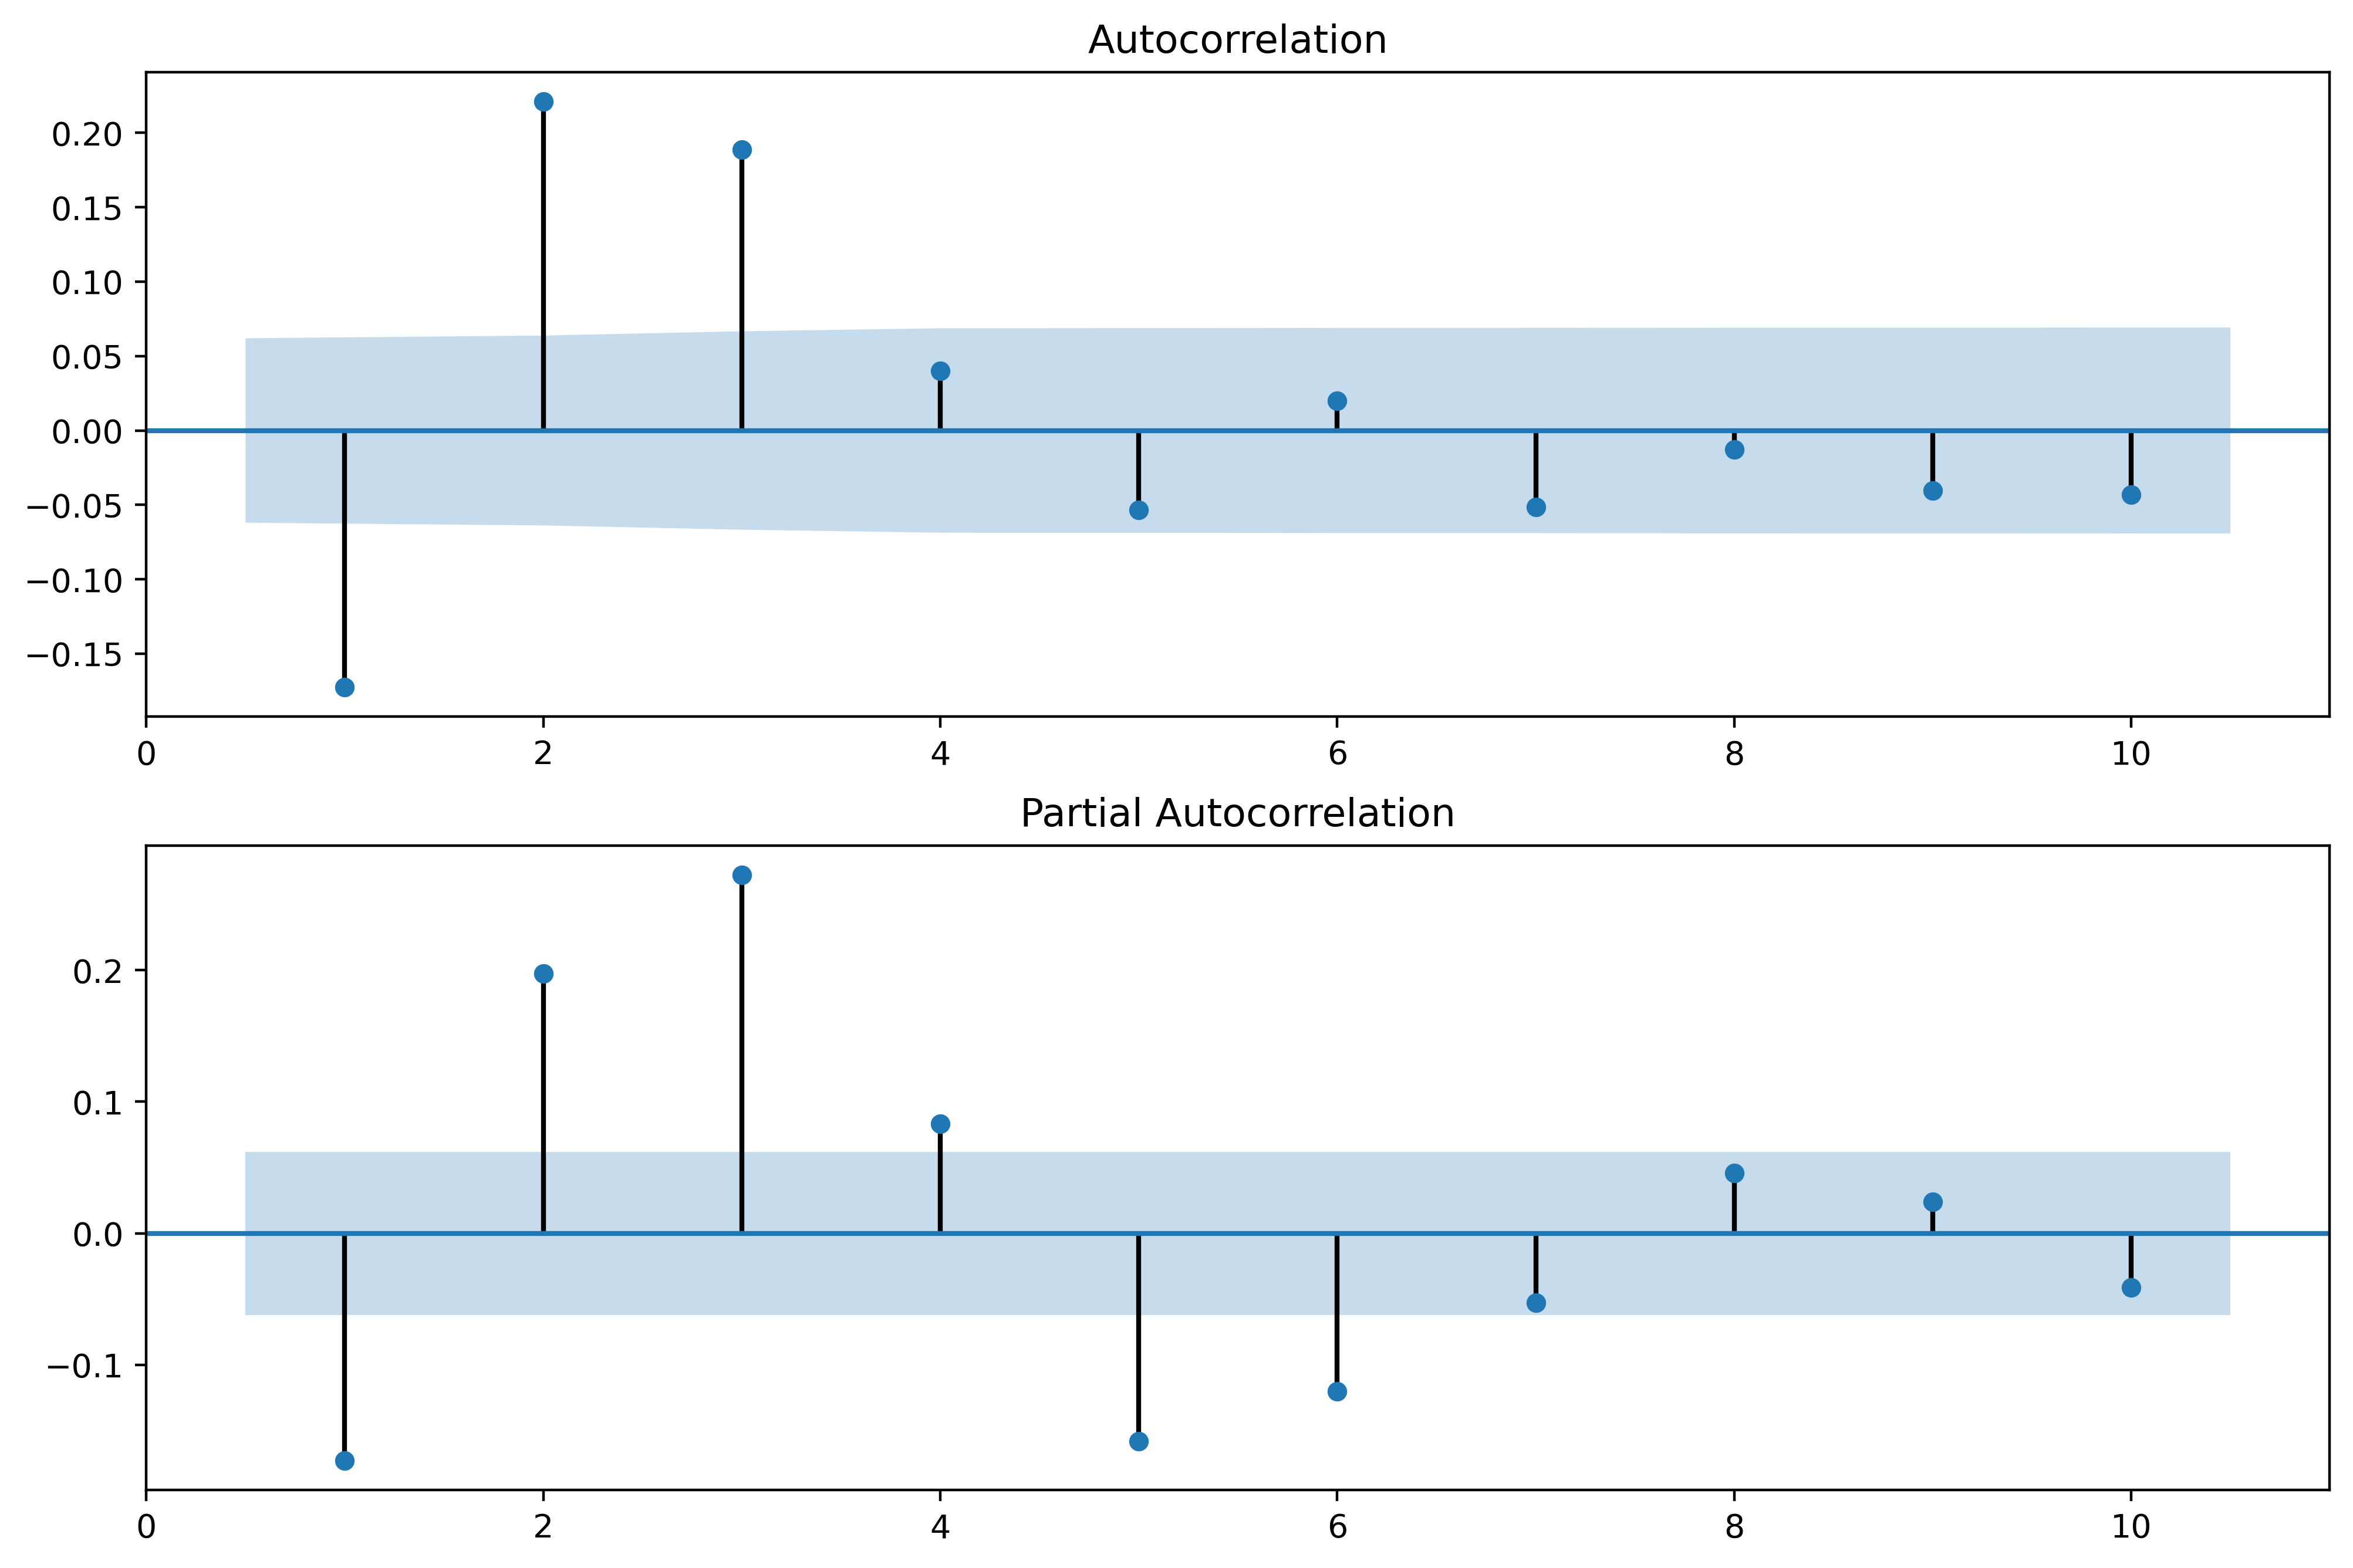

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
plot_acf(df, lags=10, zero=False, ax=ax1)
plot_pacf(df, lags=10, zero=False, ax=ax2)
plt.show()

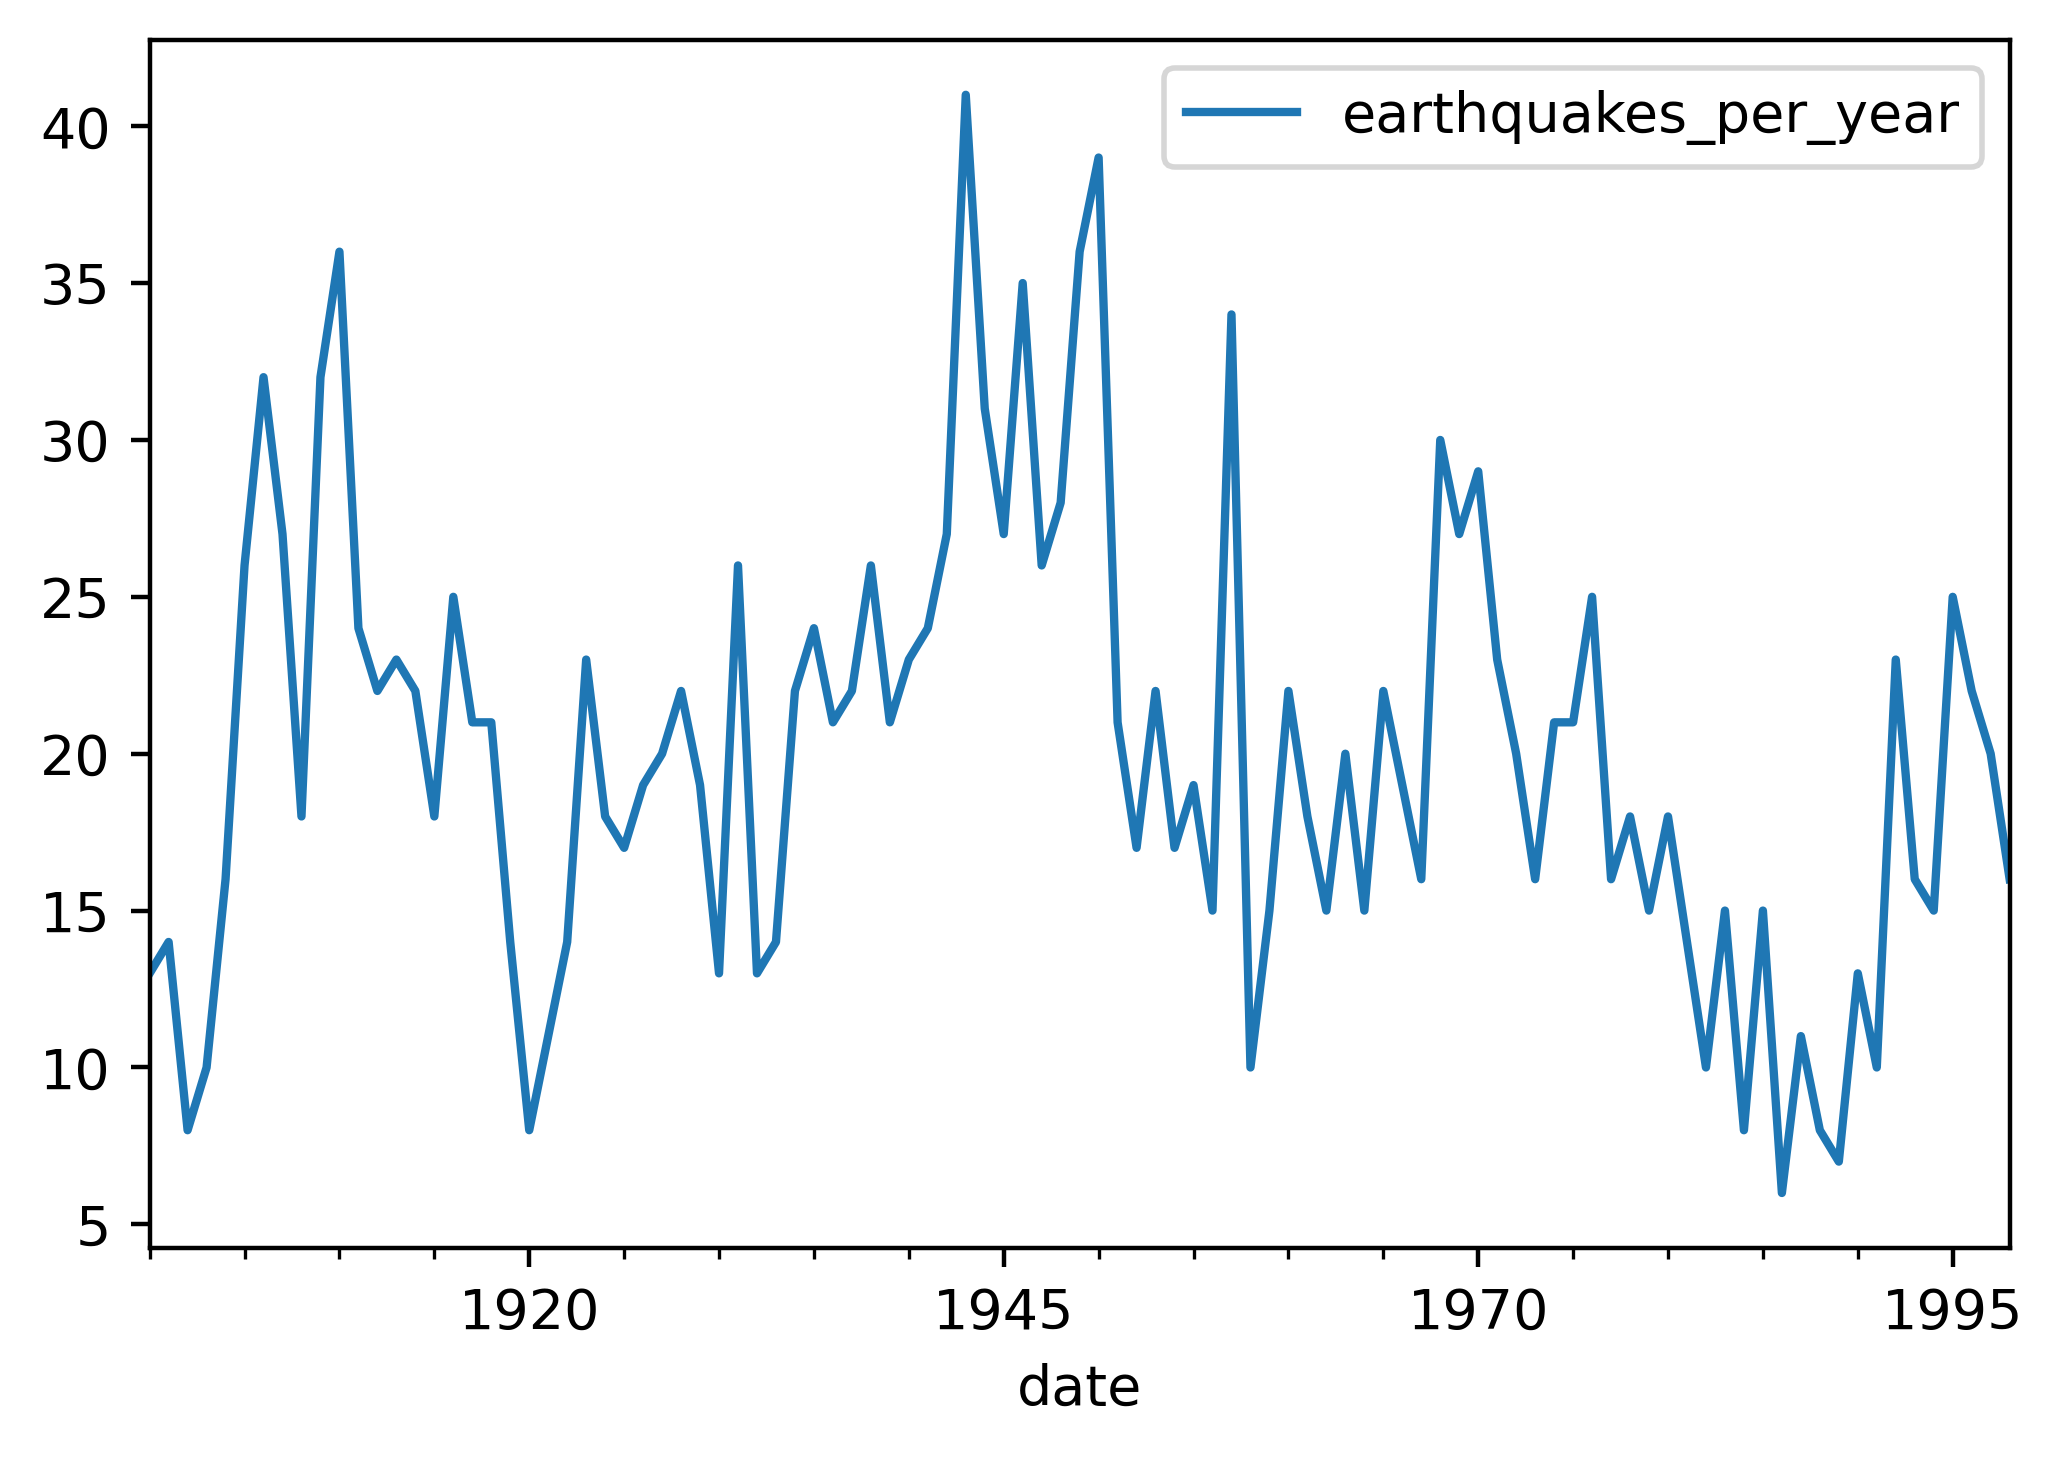

In [25]:
df = pd.read_csv('data/earthquakes.csv',  index_col='date', parse_dates=True)
df = df.drop('Year', axis=1)
df.plot()

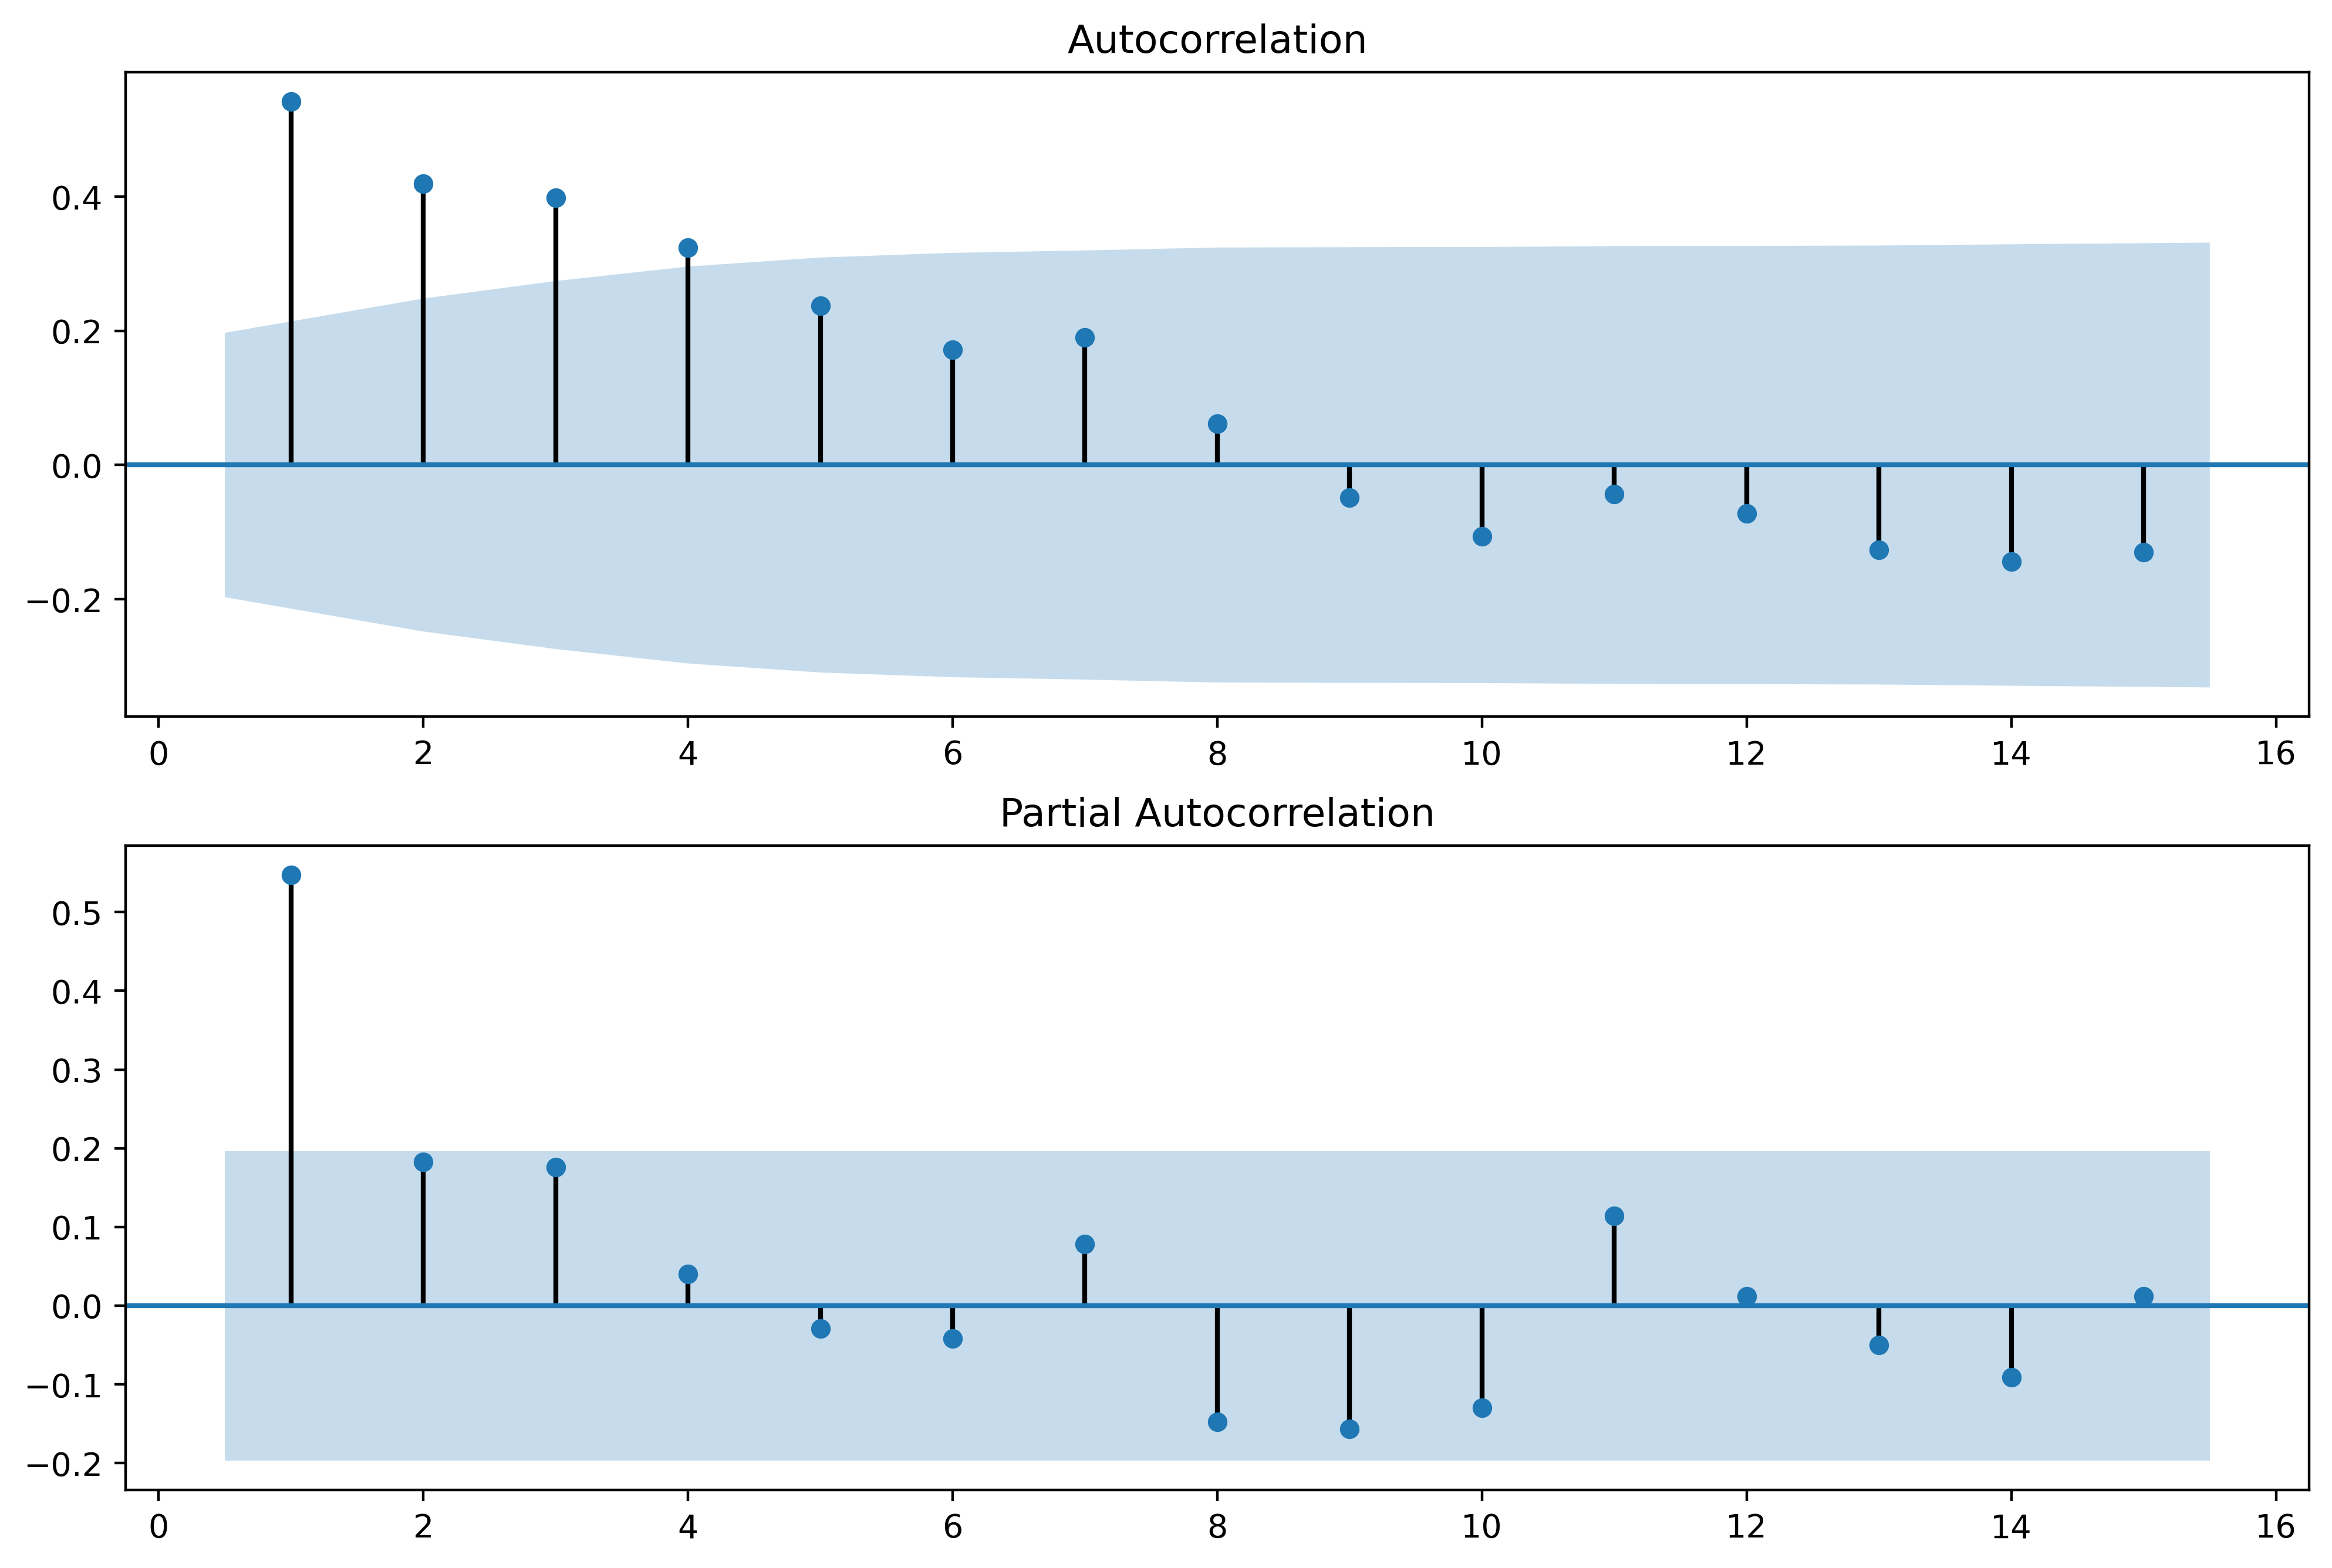

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
plot_acf(df, lags=15, zero=False, ax=ax1)
plot_pacf(df, lags=15, zero=False, ax=ax2)
plt.show()

In [27]:
model = SARIMAX(df, order =(1,0,0))
results = model.fit()
results.summary()

C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                 SARIMAX(1, 0, 0)   Log Likelihood                -331.323
Date:                  Thu, 15 Oct 2020   AIC                            666.646
Time:                          09:34:55   BIC                            671.836
Sample:                      01-01-1900   HQIC                           668.746
                           - 01-01-1998                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9433      0.029     32.767      0.000       0.887       1.000
sigma2        46.2114      5.459      8.466      0.000      35.513      56.910
===================================================================================
Ljung-Box (L1) (Q):                  13.39   Jarque-Bera (JB):                 4.60
Prob(Q):                              0.00   Prob(JB):                         0.10
Heteroskedasticity (H):               0.78   Skew:                            -0.09
Prob(H) (two-sided):                  0.49   Kurtosis:                         4.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
order_aic_bic = []
for p in range(4):
    for q in range(4):
        try:
            model = SARIMAX(df, order=(p,0,q))
            results = model.fit()
            order_aic_bic.append((p,q,results.aic,results.bic))
            #print(p,q,results.aic, results.bic)
        except:
            print(p,q,None,None)

C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq,

In [29]:
order_df = pd.DataFrame(order_aic_bic, columns=['p','q', 'AIC', 'BIC'])
print(order_df.sort_values('AIC').reset_index())

    index  p  q         AIC         BIC
0       5  1  1  647.132300  654.917660
1       6  1  2  648.738566  659.119046
2       9  2  1  648.842840  659.223319
3      10  2  2  648.850644  661.826244
4      12  3  0  649.748166  660.128646
5       7  1  3  649.986498  662.962097
6      13  3  1  650.009945  662.985544
7      11  2  3  651.902411  667.473131
8      15  3  3  651.968894  670.134733
9      14  3  2  652.004944  667.575663
10      8  2  0  656.028374  663.813734
11      4  1  0  666.645526  671.835765
12      3  0  3  738.361676  748.742155
13      2  0  2  761.067479  768.852838
14      1  0  1  799.674173  804.864412
15      0  0  0  888.429772  891.024892


In [59]:
earthquake = pd.read_csv('data/earthquakes.csv', parse_dates=['date'], index_col='date', )

In [60]:
earthquake = earthquake.drop('Year', axis=1)

In [61]:
earthquake.dtypes

earthquakes_per_year    float64
dtype: object

In [63]:
order_aic_bic = []
for p in range(4):
    for q in range(4):
        try:
            model = SARIMAX(earthquake, order=(p,0,q))
            results = model.fit()
            order_aic_bic.append((p,q,results.aic,results.bic))
            #print(p,q,results.aic, results.bic)
        except:
            print(p,q,None,None)

order_df = pd.DataFrame(order_aic_bic, columns=['p','q', 'AIC', 'BIC'])
print(order_df.sort_values('AIC').reset_index())

C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq,

In [66]:
model = SARIMAX(earthquake, order=(1,0,1))
results = model.fit()
mae = np.mean(np.abs(results.resid))
print(mae)


4.755625669545705


C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


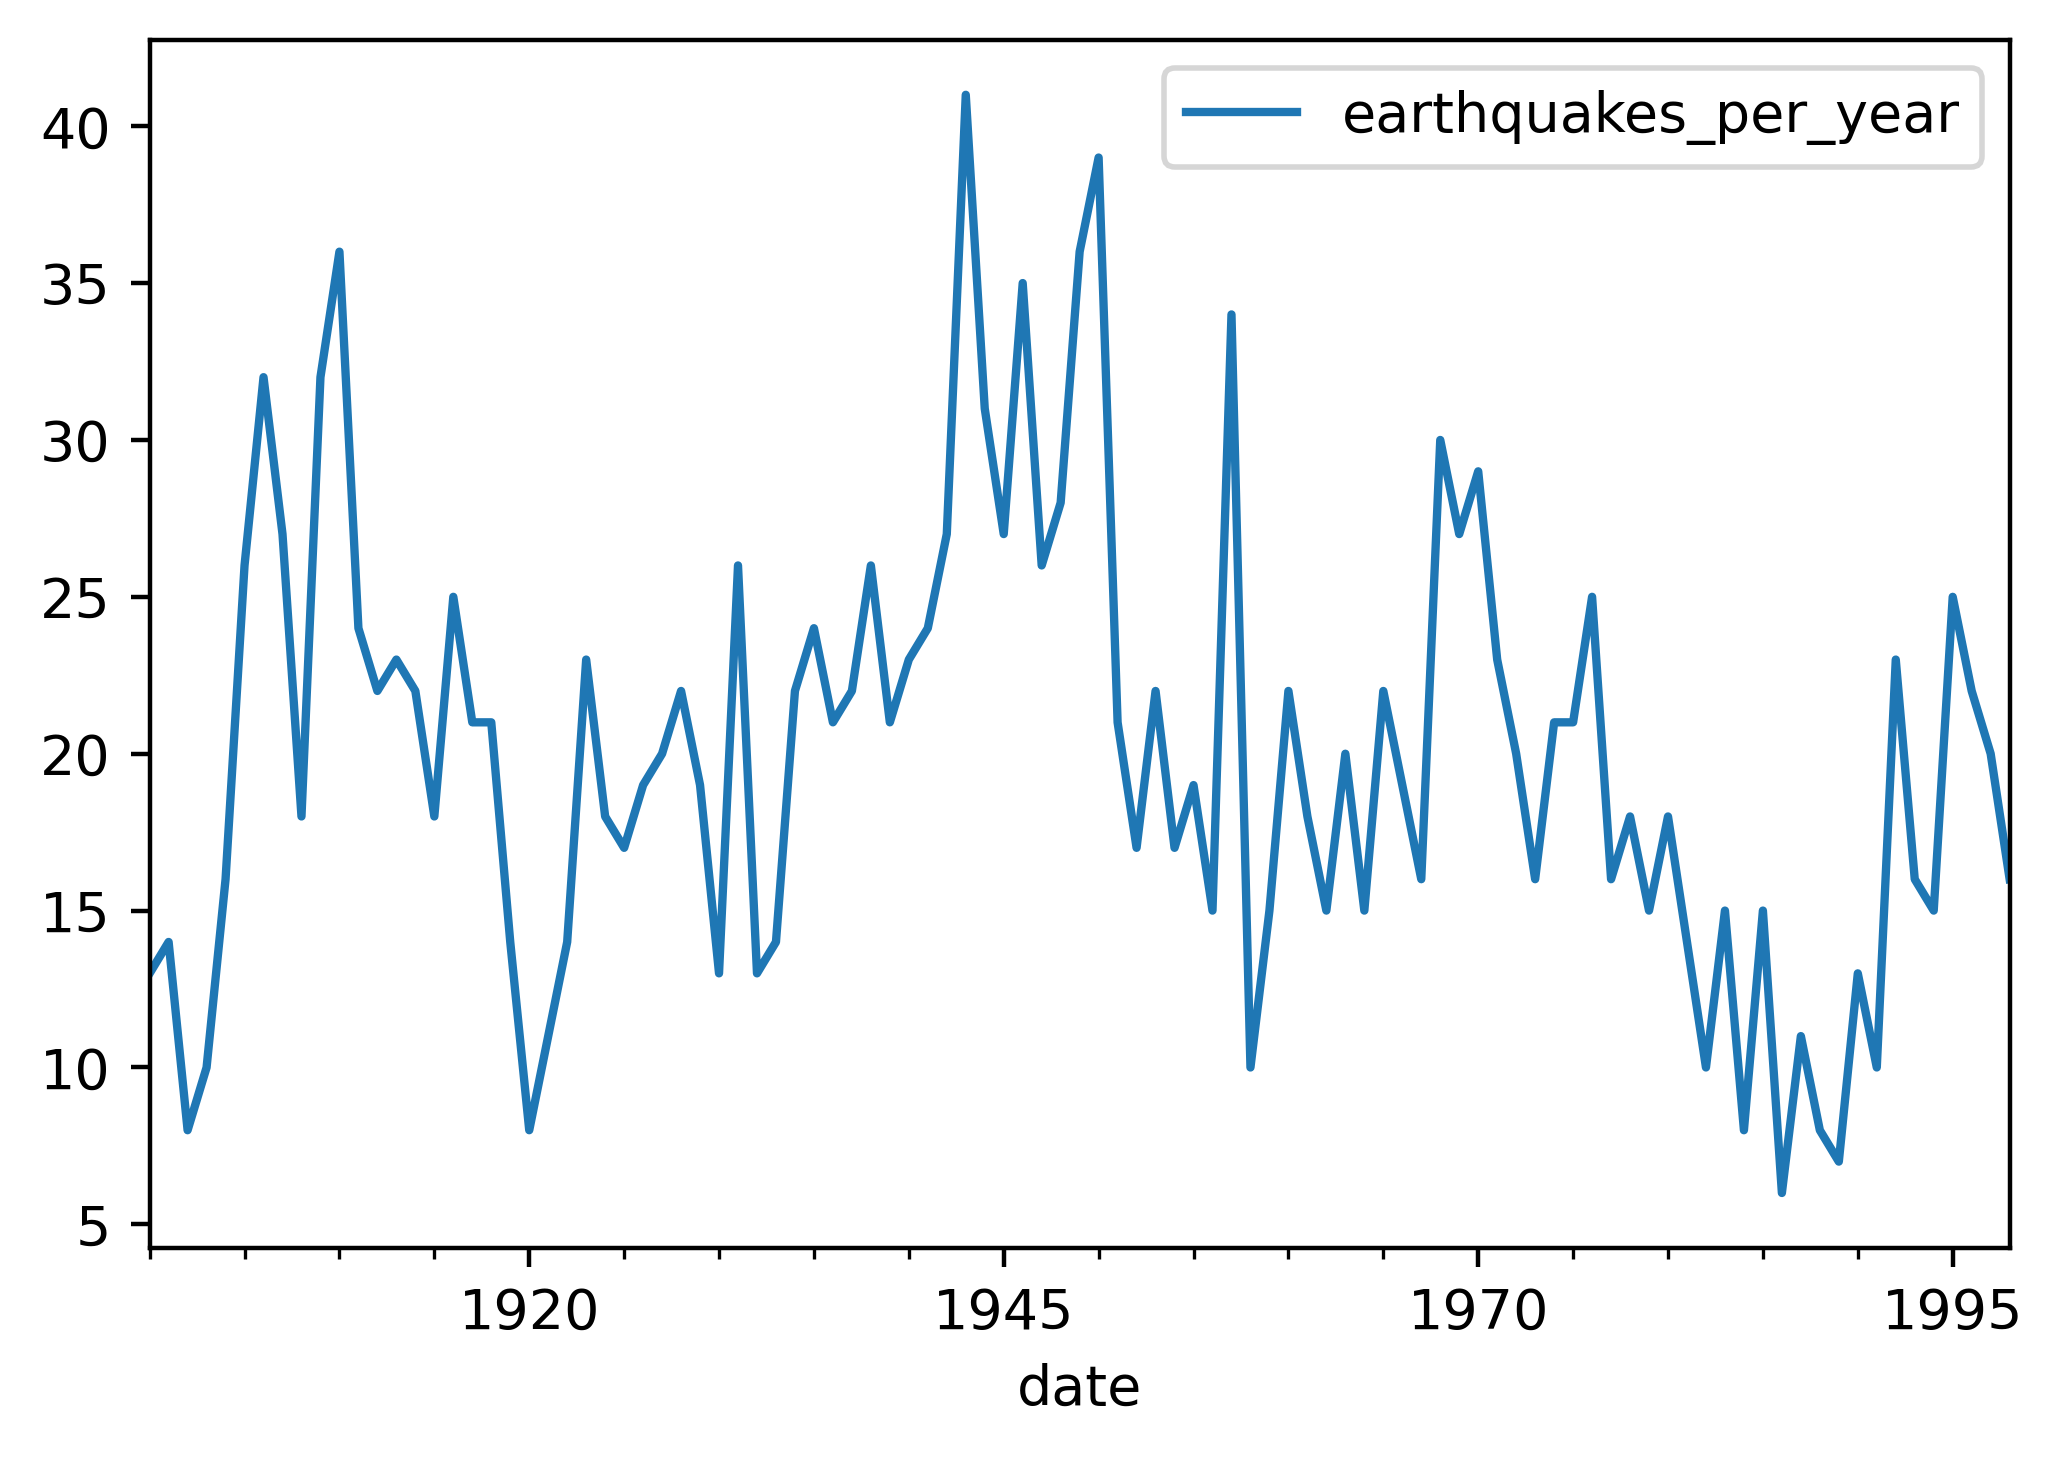

In [67]:
earthquake.plot()
plt.show()

In [77]:
y = [[ 1.62434536e+00],
       [-9.36625486e-01],
       [-1.13438304e-01],
       [-6.25882415e-01],
       [ 8.21034668e-01],
       [-2.63826549e+00],
       [ 2.14788903e+00],
       [-1.35120423e+00],
       [ 5.03789025e-02],
       [ 3.40816508e-02],
       [ 1.14504173e+00],
       [-2.36233892e+00],
       [ 2.98623958e-01],
       [-3.86422063e-01],
       [ 5.61366659e-01],
       [-1.37158266e+00],
       [ 1.67276197e-02],
       [-9.30363728e-01],
       [-1.95594375e-01],
       [ 3.69537193e-01],
       [-1.55673802e+00],
       [ 1.33446479e+00],
       [ 4.91133641e-01],
       [ 8.10020398e-02],
       [ 1.25677402e+00],
       [-6.64766742e-01],
       [ 2.91406873e-01],
       [-6.25682823e-01],
       [-1.90874180e-01],
       [ 5.53919970e-01],
       [-1.02125508e+00],
       [-2.37859069e-01],
       [-6.30007573e-01],
       [-1.05600293e+00],
       [-7.20643966e-01],
       [-2.83558014e-01],
       [-1.60279644e+00],
       [ 1.36424366e-01],
       [ 1.19749321e+00],
       [-8.97012306e-02],
       [-1.42992971e-01],
       [-5.03069878e-01],
       [-5.86685556e-01],
       [ 1.71442167e+00],
       [-5.53744533e-01],
       [-5.40733760e-01],
       [ 7.31518396e-01],
       [ 1.84186222e+00],
       [-3.41647815e-01],
       [ 1.13481860e+00],
       [ 7.12720350e-01],
       [-2.46559531e-01],
       [-5.78509546e-01],
       [ 1.00065981e-01],
       [-2.83754587e-01],
       [ 4.67376335e-01],
       [ 6.83002967e-01],
       [ 7.56056245e-01],
       [ 3.58675819e-01],
       [ 1.19144469e+00],
       [-6.02243784e-01],
       [ 1.76485484e+00],
       [ 5.50539508e-01],
       [-2.24619997e-01],
       [ 1.19504835e+00],
       [ 1.76155310e-02],
       [ 1.32768613e+00],
       [ 1.67513422e+00],
       [ 2.16796567e+00],
       [-1.10203971e+00],
       [-1.99235475e-01],
       [ 3.38826490e-01],
       [-2.51995300e-02],
       [ 8.33632503e-01],
       [ 2.32755562e-01],
       [-1.93444950e+00],
       [ 4.03652265e-01],
       [ 6.43137841e-01],
       [-4.53588271e-01],
       [ 8.97347180e-01],
       [-2.58973080e-01],
       [-1.16563979e-01],
       [ 4.52541952e-01],
       [ 2.98332705e-01],
       [ 1.60656693e-01],
       [ 2.71013526e-01],
       [-5.57632377e-01],
       [ 6.25398947e-01],
       [ 4.08696121e-02],
       [ 1.05481456e+00],
       [ 1.16134777e+00],
       [ 1.64839627e-01],
       [ 1.34366011e-01],
       [-1.31336065e-01],
       [ 6.78304960e-01],
       [ 3.21648484e-02],
       [-2.67579039e-01],
       [ 3.29919513e-01],
       [-6.43954303e-01],
       [ 8.05347048e-01],
       [-6.05818477e-01],
       [ 1.26594755e+00],
       [ 2.83174504e-01],
       [ 5.72292447e-01],
       [-7.79336994e-01],
       [ 6.19333128e-01],
       [ 7.67495369e-01],
       [-1.20905247e+00],
       [ 2.38285440e-01],
       [ 1.24746759e-01],
       [-1.68548566e+00],
       [ 6.54981006e-01],
       [ 5.17437826e-01],
       [-1.43626985e+00],
       [ 7.64755643e-01],
       [-1.47299426e+00],
       [-7.02397387e-02],
       [-1.67635984e+00],
       [ 9.82567204e-01],
       [-1.85611943e-01],
       [-4.72242821e-01],
       [-5.57353042e-01],
       [ 1.30043696e+00],
       [ 1.46187521e+00],
       [-2.20904339e+00],
       [ 2.25516038e+00],
       [ 1.47907147e+00],
       [-2.14057322e-01],
       [-3.49714865e-01],
       [ 1.58906422e+00],
       [-4.15177645e-01],
       [-3.78263918e-01],
       [-6.93024603e-01],
       [ 6.50046399e-01],
       [ 4.40566161e-01],
       [-8.95214274e-01],
       [ 9.01241280e-01],
       [-1.25726317e+00],
       [ 9.31121106e-01],
       [-8.19591503e-02],
       [-3.99690606e-01],
       [ 1.77200500e-01],
       [ 8.12604102e-01],
       [ 4.86539121e-01],
       [ 5.68676715e-01],
       [ 3.76818339e-01],
       [ 3.33889678e-01],
       [ 8.74389574e-01],
       [ 3.14242875e-01],
       [ 9.19272145e-01],
       [-9.77895339e-02],
       [-2.07345439e+00],
       [ 1.81815423e+00],
       [ 1.61311995e+00],
       [-3.11822928e-01],
       [ 6.04323399e-01],
       [ 3.75605566e-01],
       [-1.32424066e-02],
       [ 3.08219557e-01],
       [-9.86386407e-01],
       [-2.21456291e-01],
       [-9.68855534e-01],
       [ 1.10814476e-01],
       [-6.20407447e-01],
       [ 2.53669160e-01],
       [-3.88736788e-01],
       [ 8.64484055e-01],
       [ 2.43514099e-03],
       [ 2.18315885e+00],
       [-2.07542271e+00],
       [ 1.51811629e-01],
       [ 1.35060617e+00],
       [ 1.80067577e+00],
       [-5.11400190e-01],
       [ 8.32436413e-01],
       [ 2.81751394e-01],
       [ 1.44059375e+00],
       [-2.36604420e-01],
       [ 1.11524593e+00],
       [-2.74407171e-02],
       [-1.02729449e+00],
       [ 9.21671532e-01],
       [ 2.87596538e-01],
       [ 1.04717605e+00],
       [-5.96764187e-02],
       [-2.94481426e-01],
       [ 1.02073911e+00],
       [ 9.71834630e-02],
       [ 3.33965689e-01],
       [ 2.01742766e-01],
       [ 1.29839483e+00],
       [ 2.91768889e-01],
       [ 2.14318958e+00],
       [ 1.20185027e+00],
       [ 9.62086396e-01],
       [-8.45617712e-01],
       [ 1.55896137e+00],
       [ 5.14984933e-01],
       [ 7.94472466e-01],
       [ 1.45128924e+00],
       [-2.55691923e-01],
       [ 1.44729947e+00],
       [-2.80528783e-01],
       [ 2.30826914e+00],
       [-1.30950409e+00],
       [-1.11455828e+00],
       [-8.03390600e-01],
       [-1.09144115e+00],
       [-1.45613844e+00],
       [ 1.68689427e+00],
       [-1.36329377e+00],
       [-1.48051800e+00],
       [ 1.60254344e+00],
       [-1.46567622e+00],
       [-1.33111053e+00],
       [ 1.30141168e+00],
       [-2.15173305e-01],
       [-7.82533490e-01],
       [ 1.80716250e+00],
       [-3.33502860e-01],
       [ 1.67154129e+00],
       [ 6.60258309e-01],
       [ 1.70826651e+00],
       [ 4.46101734e-01],
       [-6.68224238e-01],
       [ 3.35016984e+00],
       [-9.45382106e-01],
       [ 3.39922874e-01],
       [ 2.09219673e-01],
       [-1.87982987e-01],
       [ 4.28710274e-01],
       [ 1.97069678e-01],
       [ 6.49525360e-01],
       [ 1.82683168e+00],
       [-2.86402891e-01],
       [-6.65397710e-01],
       [-3.88152752e-01],
       [-5.68874765e-01],
       [-1.80860679e+00],
       [ 9.16207109e-01],
       [-1.18648559e+00],
       [-6.39510084e-01],
       [ 6.50180174e-02],
       [-1.87339887e+00],
       [-8.08519542e-01],
       [ 4.97080111e-01],
       [-2.57889886e-01],
       [-7.97662499e-01],
       [ 1.96126630e+00],
       [-1.88966023e+00],
       [ 1.07193536e-02],
       [ 8.41761987e-02],
       [-3.28016966e+00],
       [ 2.46748839e+00],
       [-5.98958862e-01],
       [-1.70493809e+00],
       [ 2.81451119e+00],
       [-2.68914190e-01],
       [ 2.78356933e-01],
       [ 8.25499733e-02],
       [ 2.71574370e-01],
       [-1.43037262e+00],
       [ 1.18877279e+00],
       [-6.98671081e-01],
       [-1.48446439e-02],
       [ 1.37725356e+00],
       [-1.50713245e-01],
       [ 4.32969007e-01],
       [ 6.24089391e-01],
       [-7.12432628e-01],
       [ 1.23945152e+00],
       [ 1.46124314e+00],
       [ 4.76082756e-01],
       [ 1.36895948e+00],
       [-4.72268723e-01],
       [-2.35212918e-01],
       [-8.87827051e-01],
       [ 1.38700997e+00],
       [-7.33284077e-01],
       [ 1.41382337e+00],
       [-7.91036352e-01],
       [-2.19259662e-01],
       [ 4.70691558e-01],
       [ 6.58728860e-01],
       [-1.21451526e-01],
       [ 4.53707783e-01],
       [ 1.71889272e-01],
       [ 2.43724476e-01],
       [-9.74763697e-01],
       [ 4.18703414e-01],
       [-2.90822179e-01],
       [-2.38621427e-01],
       [ 5.52968346e-01],
       [-9.08053212e-01],
       [ 6.78973347e-02],
       [-2.80939880e-01],
       [ 2.19580085e-01],
       [ 6.45719282e-01],
       [-1.16665048e+00],
       [ 9.50890844e-01]]
y = [val.pop() for val in y]
dates = pd.date_range(start ='2013-01-01',  
         end ='2013-10-27', freq ='1D')
dic = {'dates':dates, 'y':y}
df= pd.DataFrame(dic)

In [79]:
df.set_index('dates', inplace=True)

In [80]:
df

,y
dates,
2013-01-01,1.624345
2013-01-02,-0.936625
2013-01-03,-0.113438
2013-01-04,-0.625882
2013-01-05,0.821035
...,...
2013-10-23,-0.280940
2013-10-24,0.219580
2013-10-25,0.645719


In [81]:
order_aic_bic = []
for p in range(4):
    for q in range(4):
        try:
            model = SARIMAX(df, order=(p,0,q))
            results = model.fit()
            order_aic_bic.append((p,q,results.aic,results.bic))
            #print(p,q,results.aic, results.bic)
        except:
            print(p,q,None,None)

order_df = pd.DataFrame(order_aic_bic, columns=['p','q', 'AIC', 'BIC'])
print(order_df.sort_values('AIC').reset_index())

C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\p

    index  p  q         AIC         BIC
0      13  3  1  825.683420  844.202332
1      14  3  2  827.666967  849.889662
2       6  1  2  828.118397  842.933527
3      15  3  3  828.338740  854.265217
4      12  3  0  828.987297  843.802427
5       7  1  3  829.965313  848.484226
6      10  2  2  830.036812  848.555725
7       3  0  3  830.672293  845.487423
8      11  2  3  831.762139  853.984834
9       9  2  1  836.234143  851.049273
10      2  0  2  839.076249  850.187597
11      4  1  0  849.807115  857.214680
12      8  2  0  850.532051  861.643398
13      5  1  1  851.420402  862.531749
14      1  0  1  853.316136  860.723701
15      0  0  0  864.048957  867.752740


In [82]:
model1 = SARIMAX(df, order=(3,0,1))
results1 = model1.fit()
print(results1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  300
Model:               SARIMAX(3, 0, 1)   Log Likelihood                -407.842
Date:                Thu, 15 Oct 2020   AIC                            825.683
Time:                        09:56:06   BIC                            844.202
Sample:                    01-01-2013   HQIC                           833.095
                         - 10-27-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1533      0.139      1.100      0.271      -0.120       0.427
ar.L2          0.2072      0.060      3.471      0.001       0.090       0.324
ar.L3          0.2522      0.061      4.139      0.0

C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [83]:
# Create and fit model
model2 = SARIMAX(df, order=(2,0,0))
results2 = model2.fit()

# Print summary
print(results2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  300
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -422.266
Date:                Thu, 15 Oct 2020   AIC                            850.532
Time:                        09:57:45   BIC                            861.643
Sample:                    01-01-2013   HQIC                           854.979
                         - 10-27-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2159      0.053     -4.045      0.000      -0.320      -0.111
ar.L2          0.0654      0.057      1.156      0.248      -0.045       0.176
sigma2         0.9773      0.076     12.831      0.0

C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


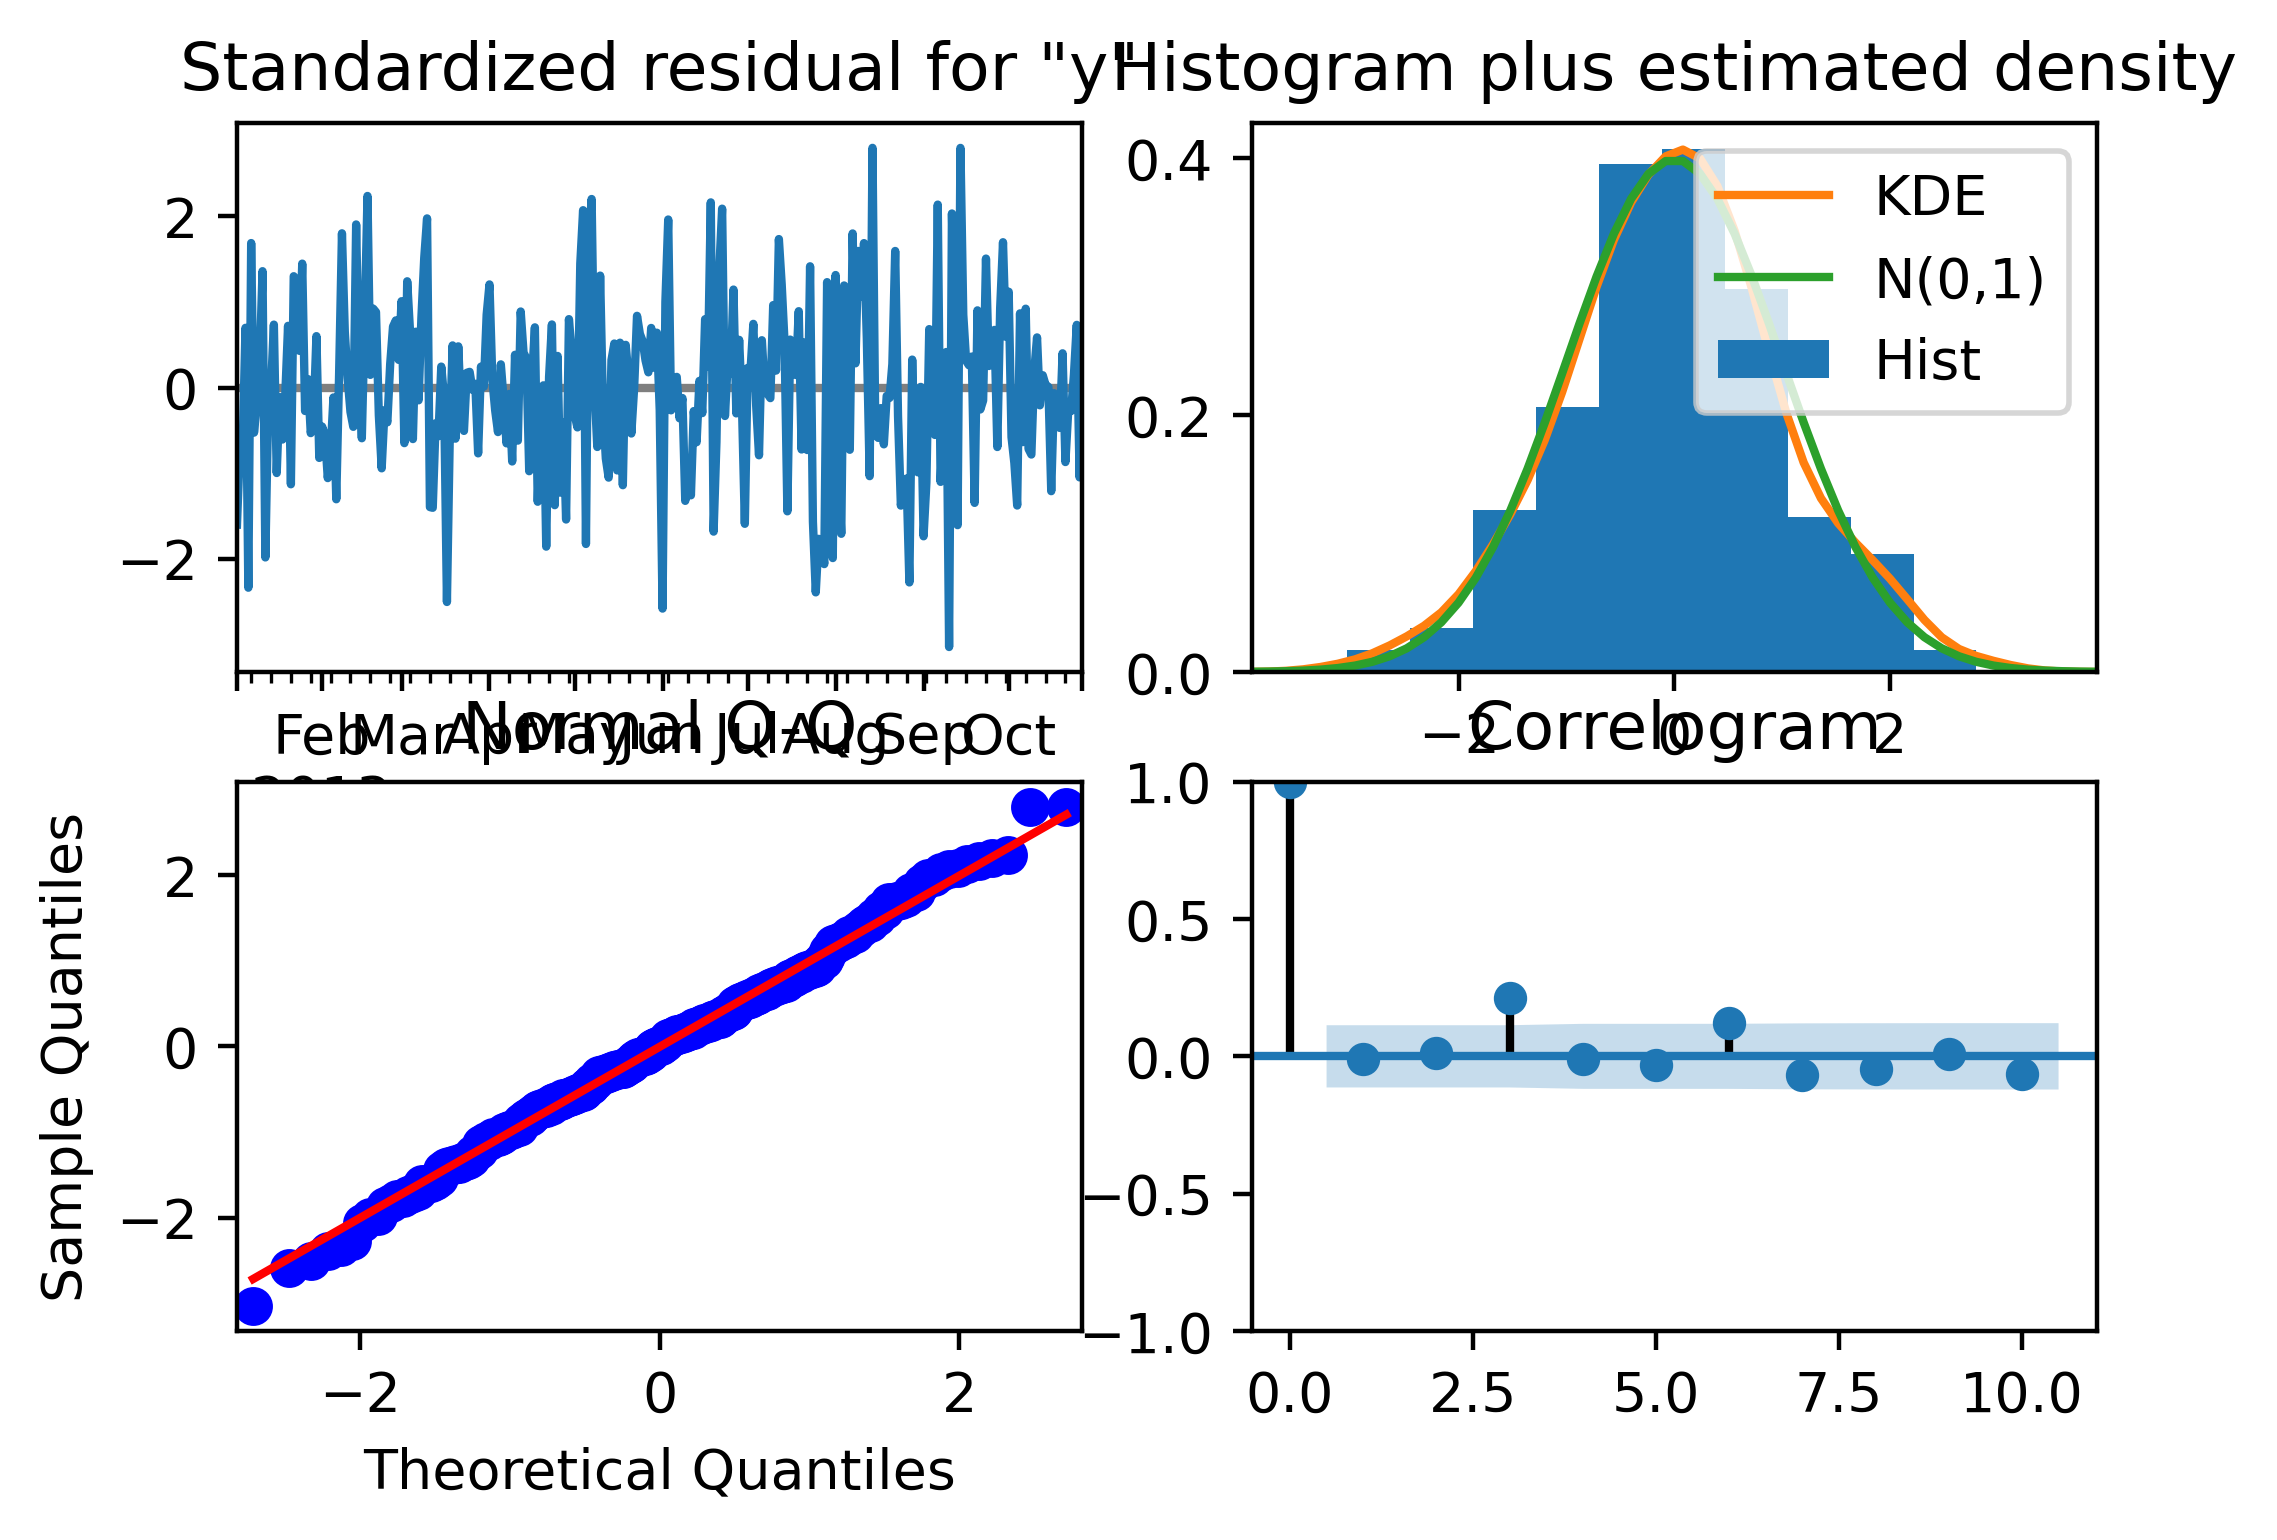

In [84]:
# Create and fit model
model = SARIMAX(df, order=(1,1,1))
results = model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()